<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Goal" data-toc-modified-id="Goal-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Goal</a></span></li><li><span><a href="#Var" data-toc-modified-id="Var-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Var</a></span></li><li><span><a href="#Init" data-toc-modified-id="Init-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Init</a></span></li><li><span><a href="#Merging-reps" data-toc-modified-id="Merging-reps-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Merging reps</a></span></li><li><span><a href="#Clustering-reps" data-toc-modified-id="Clustering-reps-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Clustering reps</a></span><ul class="toc-item"><li><span><a href="#LLMGAG" data-toc-modified-id="LLMGAG-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>LLMGAG</a></span><ul class="toc-item"><li><span><a href="#Run" data-toc-modified-id="Run-5.1.1"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span>Run</a></span></li></ul></li></ul></li><li><span><a href="#Summary" data-toc-modified-id="Summary-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Summary</a></span><ul class="toc-item"><li><span><a href="#Number-of-genes-merged-&amp;-clustered" data-toc-modified-id="Number-of-genes-merged-&amp;-clustered-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Number of genes merged &amp; clustered</a></span></li><li><span><a href="#Taxonomy" data-toc-modified-id="Taxonomy-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Taxonomy</a></span><ul class="toc-item"><li><span><a href="#Summary" data-toc-modified-id="Summary-6.2.1"><span class="toc-item-num">6.2.1&nbsp;&nbsp;</span>Summary</a></span><ul class="toc-item"><li><span><a href="#Phylum" data-toc-modified-id="Phylum-6.2.1.1"><span class="toc-item-num">6.2.1.1&nbsp;&nbsp;</span>Phylum</a></span></li><li><span><a href="#Class" data-toc-modified-id="Class-6.2.1.2"><span class="toc-item-num">6.2.1.2&nbsp;&nbsp;</span>Class</a></span></li></ul></li></ul></li><li><span><a href="#Annotations" data-toc-modified-id="Annotations-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Annotations</a></span><ul class="toc-item"><li><span><a href="#COG-functional-categories" data-toc-modified-id="COG-functional-categories-6.3.1"><span class="toc-item-num">6.3.1&nbsp;&nbsp;</span>COG functional categories</a></span><ul class="toc-item"><li><span><a href="#Grouped-by-taxonomy" data-toc-modified-id="Grouped-by-taxonomy-6.3.1.1"><span class="toc-item-num">6.3.1.1&nbsp;&nbsp;</span>Grouped by taxonomy</a></span></li></ul></li><li><span><a href="#KEGG-pathway" data-toc-modified-id="KEGG-pathway-6.3.2"><span class="toc-item-num">6.3.2&nbsp;&nbsp;</span>KEGG pathway</a></span><ul class="toc-item"><li><span><a href="#By-taxonomy" data-toc-modified-id="By-taxonomy-6.3.2.1"><span class="toc-item-num">6.3.2.1&nbsp;&nbsp;</span>By taxonomy</a></span></li></ul></li><li><span><a href="#CAZy" data-toc-modified-id="CAZy-6.3.3"><span class="toc-item-num">6.3.3&nbsp;&nbsp;</span>CAZy</a></span><ul class="toc-item"><li><span><a href="#By-taxonomy" data-toc-modified-id="By-taxonomy-6.3.3.1"><span class="toc-item-num">6.3.3.1&nbsp;&nbsp;</span>By taxonomy</a></span></li></ul></li></ul></li><li><span><a href="#humann2-db-genes" data-toc-modified-id="humann2-db-genes-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>humann2 db genes</a></span><ul class="toc-item"><li><span><a href="#Summary" data-toc-modified-id="Summary-6.4.1"><span class="toc-item-num">6.4.1&nbsp;&nbsp;</span>Summary</a></span><ul class="toc-item"><li><span><a href="#By-taxonomy" data-toc-modified-id="By-taxonomy-6.4.1.1"><span class="toc-item-num">6.4.1.1&nbsp;&nbsp;</span>By taxonomy</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#sessionInfo" data-toc-modified-id="sessionInfo-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>sessionInfo</a></span></li></ul></div>

# Goal

* Merge all cluster reps from all LLMGAG runs
* Re-cluster reps at 90% seqID
* Get annotations of rep seqs

> This is just multi-species. To see multi-species + multi-study (n=14), see http://127.0.0.1:9705/notebooks/notebooks/metagenome/multi-study/09_LLMGAG_all_cluster/02_linclust50/02_linclust-50.ipynb#

# Var

In [1]:
work_dir = '/ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/wOutVertebrata/LLMGAG_all_reps/'

samples_file = '/ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/LLMGQC/samples_cov-gte0.3.tsv'
metadata_file = '/ebio/abt3_projects/Georg_animal_feces/data/mapping/unified_metadata_complete_190529.tsv'

base_out_dir = '/ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/wOutVertebrata/'
out_dirs = c('MG_assembly_act', 'MG_assembly_amp', 'MG_assembly_rep', 'MG_assembly_ave', 'MG_assembly_mam')

conda_env = 'mmseqs'
threads = 24


# Init

In [11]:
library(dplyr)
library(tidyr)
library(ggplot2)
library(dtplyr)
library(data.table)
library(doParallel)
library(LeyLabRMisc)

In [3]:
make_dir(work_dir)
df.dims()

Directory already exists: /ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/wOutVertebrata/LLMGAG_all_reps/ 


# Merging reps

In [5]:
# checking for already existing merged seqs
out_file = file.path(work_dir, 'clusters_rep-seqs.faa')
if(file.exists(out_file)){
   # file.remove(out_file)
}

In [12]:
# merging (cat) sequences
merge_seqs = function(D, base_dir, out_file){
    F = file.path(base_dir, D, 'LLMGAG', 'cluster', 'linclust', 'clusters_rep-seqs.faa')
    cmd = glue::glue('cat {file} >> {out_file}', file=F, out_file=out_file) 
    bash_job(cmd, conda_env='py3')
}

# WARNING: uncomment to re-merge 
#plyr::llply(as.list(out_dirs), merge_seqs, base_dir=base_out_dir, out_file=out_file) 

[[1]]
character(0)

[[2]]
character(0)

[[3]]
character(0)

[[4]]
character(0)

[[5]]
character(0)

In [7]:
# number of merged rep sequences
# cmd = glue::glue('grep -c ">" {fasta}', fasta=out_file)
# n_seqs = as.numeric(system(cmd, intern=TRUE))
# cat('Number of rep sequences:', n_seqs , '\n')

# Clustering reps

## LLMGAG

* starting with merged reps at linclust step in the pipeline
  * moved merged rep seqs to `$WORKDIR/assembly/plass/genes.faa`
  * skipped raw & assembly steps of the pipeline
  * using `eggnog-mapper v2`

In [16]:
# config file
cat_file(file.path(work_dir, 'config.yaml'))

#-- I/O --#
# table with sample --> read_file information
samples_file: /ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/LLMGQC/final/samples.txt

# output location
output_dir: /ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/wOutVertebrata/LLMGAG_all_reps/

#-- database --#
## eggnog mapper
eggnog_diamond_db: /ebio/abt3_projects/databases_no-backup/Eggnog/v2/eggnog_proteins.dmnd
eggnog_db: /ebio/abt3_projects/databases_no-backup/Eggnog/v2/eggnog.db
## mmseqs taxonomy
mmseqs_tax_db: /ebio/abt3_projects/databases_no-backup/uniclust/uniclust50/uniclust50_2018_08_consensus
## checkM
checkM_data: /ebio/abt3_projects/databases_no-backup/checkM/
## sourmash
sourmash_db: /ebio/abt3_projects/databases_no-backup/sourmash/genbank-k31.sbt.json
sourmash_lca_db: /ebio/abt3_projects/databases_no-backup/sourmash/genbank-k31.lca.json.gz
# humann2 diamond
humann2_diamond_db: /ebio/abt3_projects/databases_no-backup/humann2/uniref50/uniref50_annota

### Run

```
(snakemake_dev) @ rick:/ebio/abt3_projects/methanogen_host_evo/bin/llmgag
$ screen -L -S llmgag-ga-all ./snakemake_sge.sh /ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/wOutVertebrata/LLMGAG_all_reps/config.yaml cluster.json /ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/wOutVertebrata/LLMGAG_all_reps/SGE_log 80
```

In [17]:
pipelineInfo('/ebio/abt3_projects/methanogen_host_evo/bin/llmgag')

LLMGAG

Ley Lab Metagenome Assembly of Genes (LLMGAG)

* Version: 0.1.3
* Authors:
  * Nick Youngblut <nyoungb2@gmail.com>
* Maintainers:
  * Nick Youngblut <nyoungb2@gmail.com>

--- conda envs ---
==> /ebio/abt3_projects/methanogen_host_evo/bin/llmgag/bin/envs/annotate.yaml <==
channels: !!python/tuple
- bioconda
dependencies:
- pigz
- bioconda::fasta-splitter
- bioconda::eggnog-mapper

==> /ebio/abt3_projects/methanogen_host_evo/bin/llmgag/bin/envs/checkm.yaml <==
channels: !!python/tuple
- bioconda
dependencies:
- python=2
- pigz
- bioconda::prodigal
- bioconda::pplacer
- bioconda::checkm-genome

==> /ebio/abt3_projects/methanogen_host_evo/bin/llmgag/bin/envs/das_tool.yaml <==
channels: !!python/tuple
- r
- bioconda
dependencies:
- pigz
- ruby
- r::r-base
- r::r-data.table
- r::r-domc
- r::r-ggplot2
- bioconda::pullseq
- bioconda::prodigal
- bioconda::blast
- bioconda::diamond
==> /ebio/abt3_projects/methanogen_host_evo/bin/llmgag/bin/envs/dask.yaml <==
channels: !!python/tuple
- co

# Summary

## Number of genes merged & clustered

In [8]:
# NOTE
F = file.path(work_dir, 'assembly', 'plass', 'genes.faa')
cmd = glue::glue('grep -c ">" {fasta}', fasta=F)
n_raw_seqs = system(cmd, intern=TRUE)
cat('Number of merge 90% seqID rep sequences:', n_raw_seqs, '\n')

Number of merge 90% seqID rep sequences: 29035083 


In [9]:
F = file.path(work_dir, 'cluster', 'linclust', 'clusters_rep-seqs.faa')
cmd = glue::glue('grep -c ">" {fasta}', fasta=F)
n_rep_seqs = system(cmd, intern=TRUE)
cat('Number of cluster rep sequences:', n_rep_seqs, '\n')

Number of cluster rep sequences: 25000233 


In [10]:
F = file.path(work_dir, 'humann2_db', 'clusters_rep-seqs.faa.gz')
cmd = glue::glue('gunzip -c {fasta} | grep -c ">"', fasta=F)
n_h2_seqs = system(cmd, intern=TRUE)
cat('Number of humann2_db-formatted seqs:', n_h2_seqs, '\n')

Number of humann2_db-formatted seqs: 3059869 


## Taxonomy

In [186]:
# reading in taxonomy table
## WARING: slow
F = file.path(work_dir, 'taxonomy', 'clusters_rep-seqs_tax_db.tsv.gz')
cmd = glue::glue('gunzip -c {file}', file=F) 
coln = c('seqID', 'taxID', 'rank', 'spp', 'lineage')
levs = c('Domain', 'Kingdom', 'Phylum', 'Class', 'Order', 'Family', 'Genus', 'Species')
tax = fread(cmd=cmd, sep='\t', header=FALSE, col.names=coln, fill=TRUE) %>%
    separate(lineage, levs, sep=':') %>%
    lazy_dt
tax 

Warning message:
“Expected 8 pieces. Additional pieces discarded in 1013650 rows [55, 63, 76, 161, 162, 325, 326, 346, 355, 375, 408, 411, 436, 469, 576, 583, 625, 628, 630, 697, ...].”
Warning message:
“Expected 8 pieces. Missing pieces filled with `NA` in 9773255 rows [1, 8, 14, 15, 16, 17, 20, 27, 30, 32, 35, 36, 37, 40, 52, 53, 56, 59, 60, 64, ...].”


Source: local data table [25,000,233 x 12]
Call:   `_DT16`

  seqID  taxID rank  spp   Domain Kingdom Phylum Class Order Family Genus
  <chr>  <int> <chr> <chr> <chr>  <chr>   <chr>  <chr> <chr> <chr>  <chr>
1 bbea… 0.     no r… uncl… ""     NA      NA     NA    NA    NA     NA   
2 bf6a… 1.99e6 spec… Sulf… "Bact… unknown Prote… Beta… Nitr… Galli… Sulf…
3 a09a… 1.80e6 spec… Verr… "Bact… unknown Verru… unkn… unkn… unkno… unkn…
4 acec… 1.99e5 spec… Cand… "Bact… unknown Prote… Beta… Burk… Burkh… Para…
5 03f6… 1.40e6 no r… Cand… "Bact… unknown Prote… Gamm… unkn… Candi… Cand…
6 1b0d… 1.14e6 spec… Acin… "Bact… unknown Prote… Gamm… Pseu… Morax… Acin…
# … with 1 more variable: Species <chr>

# Use as.data.table()/as.data.frame()/as_tibble() to access results

In [187]:
# number of sequences
tax %>% distinct(seqID) %>% as_tibble %>% nrow %>% print

[1] 25000233


In [188]:
# number of classifications per seqID
tax %>%
    group_by(seqID) %>%
    summarize(n = n()) %>%
    ungroup() %>%
    as_tibble %>%
    .$n %>% summary

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      1       1       1       1       1       1 

In [217]:
# which ranks found?
df.dims(30)
tax %>%
    group_by(rank) %>%
    #summarize(n = n_distinct(seqID)) %>%
    summarize(n = n()) %>%
    ungroup() %>%
    arrange(-n) %>%
    as_tibble
df.dims()

rank             n       
1  no rank          13294790
2  species          11308398
3  subspecies         215510
4  phylum              36306
5  superkingdom        34796
6  order               30175
7  class               26126
8  genus               25740
9  family              18002
10 varietas             3032
11 infraclass           1813
12 species group        1005
13 suborder              707
14 cohort                591
15 superorder            496
16 subfamily             493
17 kingdom               483
18 subclass              392
19 superclass            334
20 forma                 263
21 species subgroup      162
22 tribe                 135
23 subphylum             129
24 superfamily            87
25 subtribe               73
26 subkingdom             63
27 infraorder             49
28 parvorder              44
29 subgenus               39

### Summary

#### Phylum

In [220]:
# summarizing taxonomy
tax_s = tax %>%
    filter(Domain != '',
           Phylum != '') %>%
    group_by(Domain, Phylum) %>%
    summarize(n = n_distinct(seqID)) %>%
    ungroup() %>%
    filter(n > 100000) %>%
    arrange(-n) 

df.dims(30)
tax_s %>% as_tibble
df.dims()

Domain    Phylum          n      
1  Bacteria  Firmicutes      4408890
2  Bacteria  Proteobacteria  4189922
3  Bacteria  Bacteroidetes   2050562
4  Bacteria  Actinobacteria  1121882
5  Eukaryota Chordata        1003667
6  Viruses   unknown          320627
7  Bacteria  Fusobacteria     229380
8  Eukaryota Ascomycota       160973
9  Bacteria  unknown          144334
10 Eukaryota Arthropoda       130553
11 Eukaryota Streptophyta     129751
12 Bacteria  Verrucomicrobia  120386
13 Bacteria  Cyanobacteria    119966
14 Bacteria  Chloroflexi      118002
15 Eukaryota Bacillariophyta  105196

File written: /ebio/abt3_projects/Georg_animal_feces/notebooks/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/04_assemblies/02_LLMGAG/.figures/a7b03ba1185b9fcc142ab174b8ba359c.RDS 


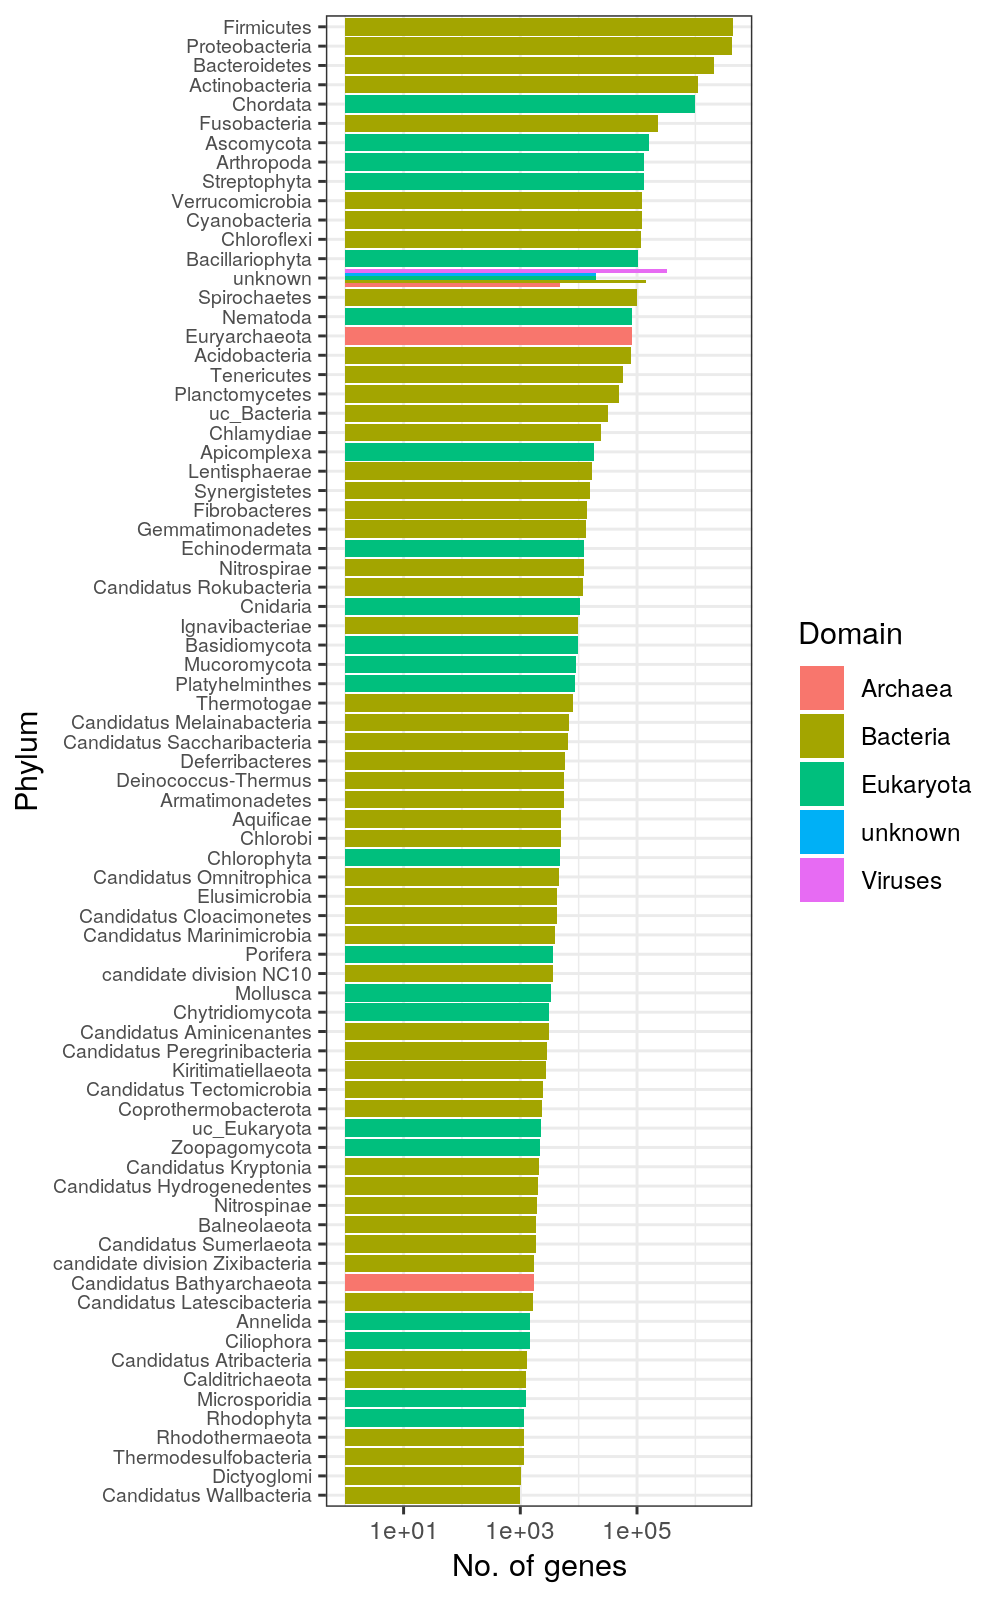

In [58]:
# plotting by phylum (w/ count cutoff)
p = tax_s %>%
    filter(n >= 1000) %>%
    mutate(Phylum = Phylum %>% reorder(n)) %>%
    ggplot(aes(Phylum, n, fill=Domain)) +
    geom_bar(stat='identity', position='dodge') +
    scale_y_log10() +
    labs(y = 'No. of genes') +
    coord_flip() +
    theme_bw() +
    theme(
        axis.text.y = element_text(size=7)
    )

p.dims(5,8)
Plot(p)

In [56]:
# top phyla
df.dims(30)
tax_s %>% 
    arrange(-n) %>%
    head(n=30)
df.dims()

Domain    Phylum           n      
1  Bacteria  Firmicutes       4408890
2  Bacteria  Proteobacteria   4189922
3  Bacteria  Bacteroidetes    2050562
4  Bacteria  Actinobacteria   1121882
5  Eukaryota Chordata         1003667
6  Viruses   unknown           320627
7  Bacteria  Fusobacteria      229380
8  Eukaryota Ascomycota        160973
9  Bacteria  unknown           144334
10 Eukaryota Arthropoda        130553
11 Eukaryota Streptophyta      129751
12 Bacteria  Verrucomicrobia   120386
13 Bacteria  Cyanobacteria     119966
14 Bacteria  Chloroflexi       118002
15 Eukaryota Bacillariophyta   105196
16 Bacteria  Spirochaetes       98064
17 Eukaryota Nematoda           83417
18 Archaea   Euryarchaeota      81655
19 Bacteria  Acidobacteria      78870
20 Bacteria  Tenericutes        56466
21 Bacteria  Planctomycetes     49527
22 Bacteria  uc_Bacteria        32369
23 Bacteria  Chlamydiae         23958
24 unknown   unknown            20034
25 Eukaryota unknown            19776
26 Eukaryota Apicomplexa        18424
27 Bacteria  Lentisphaerae      17204
28 Bacteria  Synergistetes      15760
29 Bacteria  Fibrobacteres      13935
30 Bacteria  Gemmatimonadetes   13553

#### Class

In [29]:
# summarizing taxonomy
tax_s = tax %>%
    filter(Domain != '',
           Phylum != '',
           Class != '') %>%
    group_by(Domain, Phylum, Class) %>%
    summarize(n = seqID %>% unique %>% length) %>%
    ungroup() %>%
    as_tibble
 
tax_s 

Domain  Phylum                    Class   n   
1   Archaea Candidatus Altiarchaeota  unknown 4   
2   Archaea Candidatus Bathyarchaeota unknown 5   
⋮   ⋮       ⋮                         ⋮       ⋮   
293 Viruses unknown                   unknown 1289
294 unknown unknown                   unknown   95

In [30]:
# top hits
df.dims(30)
tax_s %>% 
    arrange(-n) %>%
    head(n=30)
df.dims()

Domain    Phylum          Class                 n    
1  Bacteria  Proteobacteria  Gammaproteobacteria   12504
2  Bacteria  Firmicutes      Clostridia            11809
3  Bacteria  Bacteroidetes   Bacteroidia            6182
4  Bacteria  Actinobacteria  Actinobacteria         4101
5  Bacteria  Firmicutes      Bacilli                3597
6  Bacteria  Proteobacteria  Betaproteobacteria     1668
7  Viruses   unknown         unknown                1289
8  Bacteria  Proteobacteria  Alphaproteobacteria    1151
9  Eukaryota Chordata        Amphibia               1141
10 Bacteria  Firmicutes      unknown                1137
11 Eukaryota Chordata        Actinopteri            1100
12 Eukaryota Chordata        unknown                 955
13 Bacteria  Fusobacteria    Fusobacteriia           942
14 Bacteria  Bacteroidetes   Flavobacteriia          600
15 Bacteria  Proteobacteria  Deltaproteobacteria     597
16 Bacteria  unknown         unknown                 586
17 Bacteria  Bacteroidetes   unknown                 569
18 Eukaryota Chordata        Aves                    526
19 Eukaryota Ascomycota      Sordariomycetes         463
20 Bacteria  Cyanobacteria   unknown                 452
21 Bacteria  Firmicutes      Erysipelotrichia        424
22 Bacteria  Bacteroidetes   Cytophagia              404
23 Bacteria  Firmicutes      Negativicutes           328
24 Eukaryota Streptophyta    Liliopsida              315
25 Bacteria  Proteobacteria  Epsilonproteobacteria   312
26 Eukaryota Bacillariophyta Bacillariophyceae       301
27 Bacteria  Verrucomicrobia Verrucomicrobiae        297
28 Bacteria  Actinobacteria  Coriobacteriia          285
29 Bacteria  Spirochaetes    Spirochaetia            280
30 Bacteria  Acidobacteria   unknown                 278

## Annotations

In [59]:
# eggnog-mapper v2
cols = c(
"query_name",
"seed_eggNOG_ortholog",
"seed_ortholog_evalue",
"seed_ortholog_score",
"Predicted_taxonomic_group",
"Predicted_protein_name",
"Gene_Ontology_terms",
"EC_number",
"KEGG_ko",
"KEGG_Pathway",
"KEGG_Module",
"KEGG_Reaction",
"KEGG_rclass",
"BRITE",
"KEGG_TC",
"CAZy",
"BiGG_Reaction",
"tax_scope__eggNOG_taxonomic_level_used_for_annotation",
"eggNOG_OGs",
"bestOG",
"COG_Functional_Category",
"eggNOG_free_text_description"
)

In [60]:
F = file.path(work_dir, 'annotate', 'eggnog-mapper', 'clusters_rep-seqs.emapper.annotations.gz')
cmd = glue::glue('gunzip -c {file}', file=F, header=FALSE) 
emap_annot = fread(cmd=cmd, sep='\t') 
colnames(emap_annot) = cols
emap_annot = emap_annot %>%
    lazy_dt() %>%
    dplyr::select(-Gene_Ontology_terms)
emap_annot 

Source: local data table [?? x 21]
Call:   `_DT12`[, .(query_name, seed_eggNOG_ortholog, seed_ortholog_evalue, 
    seed_ortholog_score, Predicted_taxonomic_group, Predicted_protein_name, 
    EC_number, KEGG_ko, KEGG_Pathway, KEGG_Module, KEGG_Reaction, 
    KEGG_rclass, BRITE, KEGG_TC, CAZy, BiGG_Reaction, tax_scope__eggNOG_taxonomic_level_used_for_annotation, 
    eggNOG_OGs, bestOG, COG_Functional_Category, eggNOG_free_text_description)]

  query_name seed_eggNOG_ort… seed_ortholog_e… seed_ortholog_s… Predicted_taxon…
  <chr>      <chr>                       <dbl>            <dbl> <chr>           
1 9286dd4c2… 305700.B447_014…         3.40e-26            124   Rhodocyclales   
2 85fa5a4e3… 204773.HEAR0250          4.90e-39            167.  Oxalobacteraceae
3 81a5743f3… 998674.ATTE0100…         4.20e- 7             60.1 Thiotrichales   
4 ae37bc0f7… 706587.Desti_32…         4.50e-85            321.  Syntrophobacter…
5 ccd368885… 768706.Desor_40…         4.50e-39            167.  Pep

In [63]:
# adding taxonomy info
overlap(emap_annot %>% distinct(query_name) %>% as_tibble %>% .$query_name, 
        tax %>% distinct(seqID) %>% as_tibble %>% .$seqID)

emap_annot = emap_annot %>%
    as_tibble %>% 
    left_join(tax %>% as_tibble, by=c('query_name'='seqID')) %>%
    lazy_dt 

emap_annot

intersect(x,y): 14489715 
setdiff(x,y): 0 
setdiff(y,x): 10510518 
union(x,y): 25000233 


Source: local data table [14,489,715 x 32]
Call:   `_DT15`

  query_name seed_eggNOG_ort… seed_ortholog_e… seed_ortholog_s… Predicted_taxon…
  <chr>      <chr>                       <dbl>            <dbl> <chr>           
1 9286dd4c2… 305700.B447_014…         3.40e-26            124   Rhodocyclales   
2 85fa5a4e3… 204773.HEAR0250          4.90e-39            167.  Oxalobacteraceae
3 81a5743f3… 998674.ATTE0100…         4.20e- 7             60.1 Thiotrichales   
4 ae37bc0f7… 706587.Desti_32…         4.50e-85            321.  Syntrophobacter…
5 ccd368885… 768706.Desor_40…         4.50e-39            167.  Peptococcaceae  
6 3a6906a6d… 85643.Tmz1t_3433         2.30e-22            112.  Rhodocyclales   
# … with 27 more variables: Predicted_protein_name <chr>, EC_number <chr>,
#   KEGG_ko <chr>, KEGG_Pathway <chr>, KEGG_Module <chr>, KEGG_Reaction <chr>,
#   KEGG_rclass <chr>, BRITE <chr>, KEGG_TC <chr>, CAZy <chr>,
#   BiGG_Reaction <chr>,
#   tax_scope__eggNOG_taxonomic_level_used_for_ann

In [64]:
n_annot_seqs = emap_annot %>% distinct(query_name) %>% as_tibble %>% nrow
cat('Number of rep seqs with eggnog-mapper annotations:', n_annot_seqs, '\n')

Number of rep seqs with eggnog-mapper annotations: 14489715 


### COG functional categories

* [wiki on categories](https://ecoliwiki.org/colipedia/index.php/Clusters_of_Orthologous_Groups_%28COGs%29)

In [69]:
# summarizing by functional group
max_cat = emap_annot %>% 
    distinct(COG_Functional_Category) %>%
    as_tibble %>% .$COG_Functional_Category %>%
    sapply(nchar) %>% max

emap_annot_s = emap_annot %>%
    dplyr::select(query_name, COG_Functional_Category) %>%
    as_tibble %>%
    separate(COG_Functional_Category, LETTERS[1:max_cat], sep='(?<=[A-Z])') %>%
    gather(X, COG_func_cat, -query_name) %>%
    filter(!is.na(COG_func_cat),
           COG_func_cat != '') %>%
    dplyr::select(-X) 

emap_annot_s 

Warning message:
“Expected 6 pieces. Additional pieces discarded in 19 rows [931681, 1005364, 1385710, 1842345, 1906315, 5906001, 6355989, 6415685, 7681862, 7704633, 8127049, 8144976, 10872530, 11765126, 13146828, 13157635, 13202578, 13606114, 13673475].”
Warning message:
“Expected 6 pieces. Missing pieces filled with `NA` in 14489316 rows [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, ...].”


query_name                       COG_func_cat
1        9286dd4c295543d0a3d8234c02d56b41 J           
2        85fa5a4e3c46486e9df9583773c8a8de S           
⋮        ⋮                                ⋮           
14848103 1c80d8dd85a94f508e2ed2f100c1afcd Z           
14848104 6f7e5f9902fb4170b1c1cd526b953d46 Z

In [71]:
# summarizing
emap_annot_s_s = emap_annot_s %>%
    group_by(COG_func_cat) %>%
    summarize(n = n(),
              perc_abund = n() / n_annot_seqs * 100) %>%
    ungroup()

emap_annot_s_s

COG_func_cat n     perc_abund 
1  A            11920 0.08226525 
2  B            31481 0.21726445 
⋮  ⋮            ⋮     ⋮          
23 Y              949 0.006549473
24 Z            28509 0.196753352

File written: /ebio/abt3_projects/Georg_animal_feces/notebooks/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/04_assemblies/02_LLMGAG/.figures/408fd4ef4d48258778da620c347a61a0.RDS 


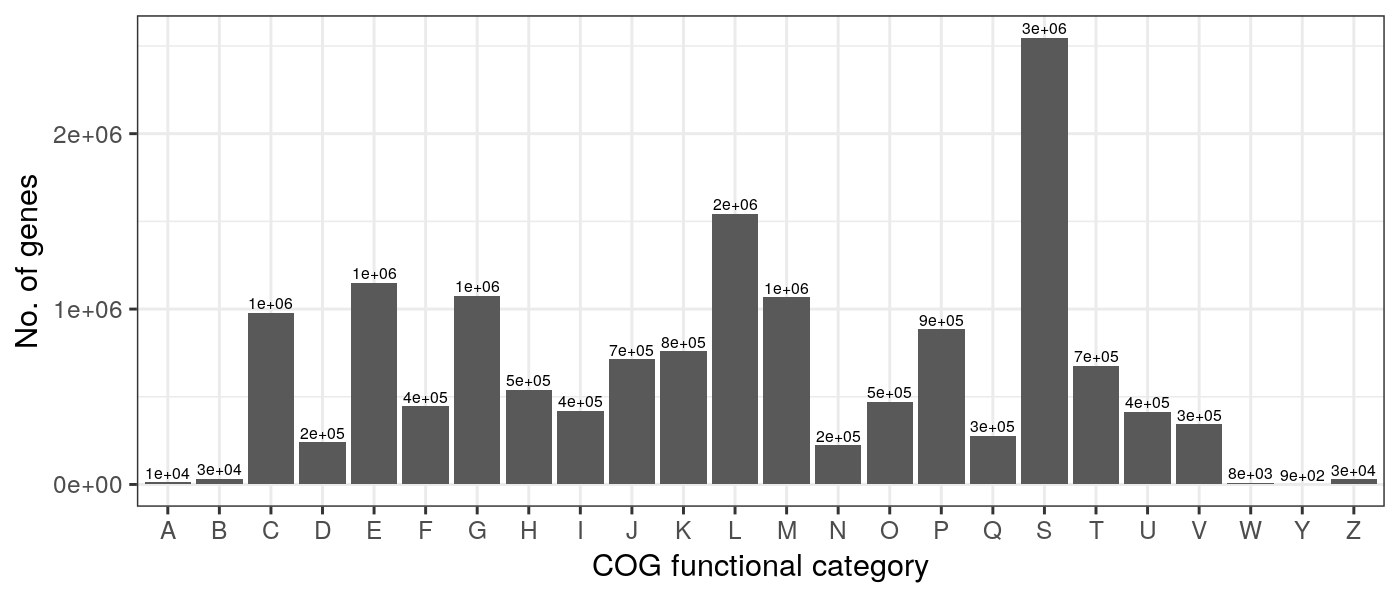

In [72]:
# plotting summary
p = emap_annot_s_s %>%
    ggplot(aes(COG_func_cat, n)) +
    geom_bar(stat='identity') +
    geom_text(aes(label=formatC(n, format='e', digits=0)), vjust=-0.3, size=2) +
    labs(x='COG functional category', y='No. of genes') +
    theme_bw()

p.dims(7,3)
Plot(p)

File written: /ebio/abt3_projects/Georg_animal_feces/notebooks/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/04_assemblies/02_LLMGAG/.figures/6c74c22d031be0e1fae658342b9f0d76.RDS 


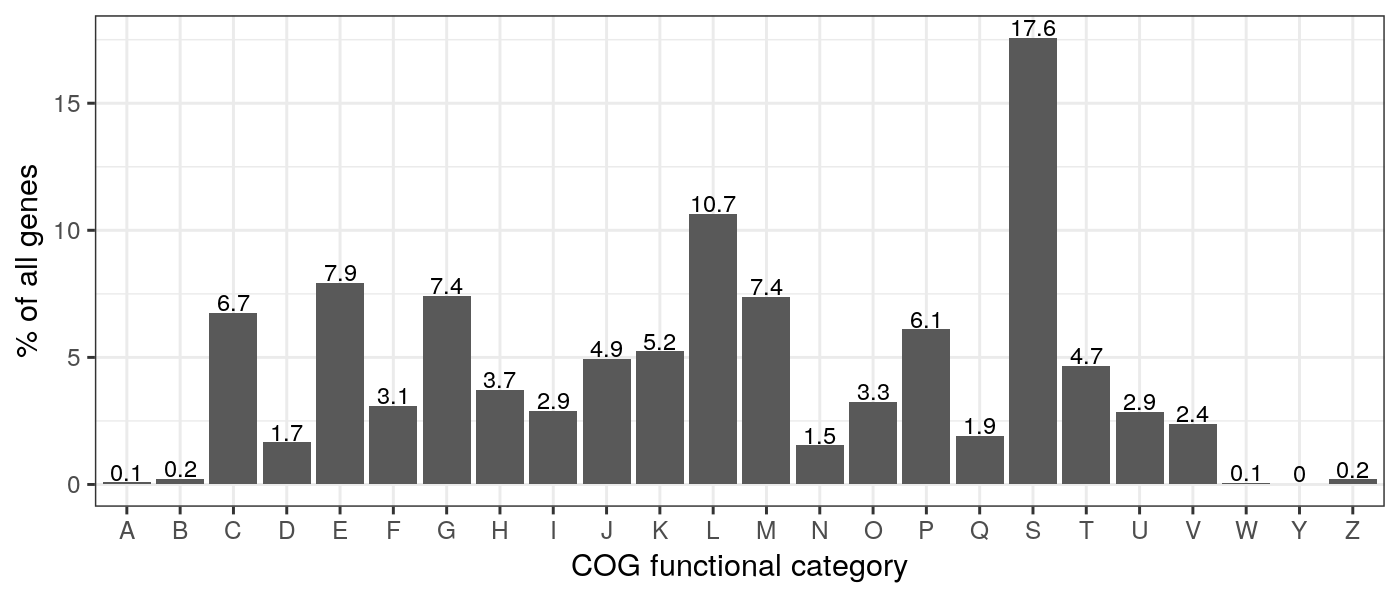

In [73]:
# plotting summary (%)
p = emap_annot_s_s %>%
    ggplot(aes(COG_func_cat, perc_abund)) +
    geom_bar(stat='identity') +
    geom_text(aes(label=round(perc_abund, 1)), vjust=-0.1, size=3) +
    labs(x='COG functional category', y='% of all genes') +
    theme_bw() 

p.dims(7,3)
Plot(p)

#### Grouped by taxonomy

In [76]:
max_cat = emap_annot %>% 
    distinct(COG_Functional_Category) %>%
    as_tibble %>% .$COG_Functional_Category %>%
    sapply(nchar) %>% max

emap_annot_s = emap_annot %>%
    dplyr::select(query_name, COG_Functional_Category) %>%
    as_tibble %>%
    separate(COG_Functional_Category, LETTERS[1:max_cat], sep='(?<=[A-Z])') %>%
    gather(X, COG_func_cat, -query_name) %>%
    left_join(tax %>% as_tibble, c('query_name'='seqID')) %>%
    filter(!is.na(COG_func_cat),
           COG_func_cat != '') %>%
    dplyr::select(-X) 

emap_annot_s 

Warning message:
“Expected 6 pieces. Additional pieces discarded in 19 rows [931681, 1005364, 1385710, 1842345, 1906315, 5906001, 6355989, 6415685, 7681862, 7704633, 8127049, 8144976, 10872530, 11765126, 13146828, 13157635, 13202578, 13606114, 13673475].”
Warning message:
“Expected 6 pieces. Missing pieces filled with `NA` in 14489316 rows [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, ...].”


query_name                       COG_func_cat taxID   rank   
1        9286dd4c295543d0a3d8234c02d56b41 J            163359  species
2        85fa5a4e3c46486e9df9583773c8a8de S             83767  species
⋮        ⋮                                ⋮            ⋮       ⋮      
14848103 1c80d8dd85a94f508e2ed2f100c1afcd Z            1982332 species
14848104 6f7e5f9902fb4170b1c1cd526b953d46 Z            1982332 species
         spp                                    Domain   Kingdom
1        Acidiferrobacter thiooxydans           Bacteria unknown
2        Propionivibrio dicarboxylicus          Bacteria unknown
⋮        ⋮                                      ⋮        ⋮      
14848103 Verrucomicrobiae bacterium Tous-C4TDCM Bacteria unknown
14848104 Verrucomicrobiae bacterium Tous-C4TDCM Bacteria unknown
         Phylum          Class               Order               
1        Proteobacteria  Gammaproteobacteria Acidiferrobacterales
2        Proteobacteria  Betaproteobacteria  Rhodocyclales       
⋮        ⋮               ⋮                   ⋮                   
14848103 Verrucomicrobia Verrucomicrobiae    unknown             
14848104 Verrucomicrobia Verrucomicrobiae    unknown             
         Family                Genus           
1        Acidiferrobacteraceae Acidiferrobacter
2        Rhodocyclaceae        Propionivibrio  
⋮        ⋮                     ⋮               
14848103 unknown               unknown         
14848104 unknown               unknown         
         Species                               
1        Acidiferrobacter thiooxydans          
2        Propionivibrio dicarboxylicus         
⋮        ⋮                                     
14848103 Verrucomicrobiae bacterium Tous-C4TDCM
14848104 Verrucomicrobiae bacterium Tous-C4TDCM

In [87]:
# summarizing
emap_annot_s_s = emap_annot_s %>%
    mutate(Domain = ifelse(Domain == '', 'unknown', Domain)) %>%
    group_by(COG_func_cat) %>%
    mutate(n_total = n(),
           perc_abund_total = n() / n_annot_seqs * 100) %>%
    group_by(COG_func_cat, Domain, n_total, perc_abund_total) %>%
    summarize(n = n(),
              perc_abund = n() / n_annot_seqs * 100) %>%
    ungroup()

emap_annot_s_s

COG_func_cat Domain   n_total perc_abund_total n    perc_abund  
1   A            Archaea  11920   0.08226525          6 4.140868e-05
2   A            Bacteria 11920   0.08226525       2432 1.678432e-02
⋮   ⋮            ⋮        ⋮       ⋮                ⋮    ⋮           
117 Z            unknown  28509   0.1967534        870  6.004259e-03
118 Z            Viruses  28509   0.1967534         10  6.901447e-05

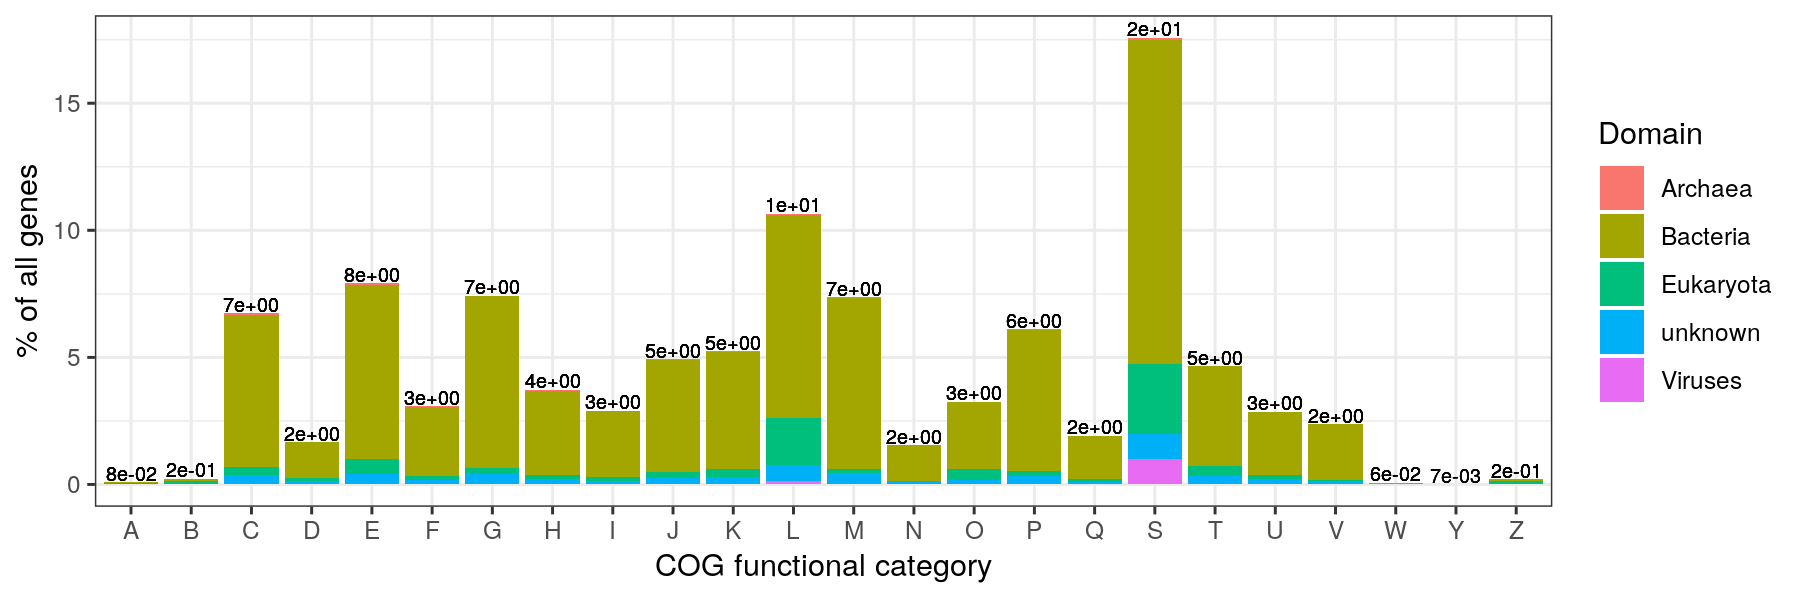

In [96]:
# plotting summary by domain
tmp = emap_annot_s_s %>%
    distinct(COG_func_cat, perc_abund_total, Domain)

p = emap_annot_s_s %>%
    ggplot(aes(COG_func_cat, perc_abund, fill=Domain)) +
    geom_bar(stat='identity') +
    geom_text(aes(y=perc_abund_total, label=formatC(perc_abund_total, format='e', digits=0)), 
              vjust=-0.1, size=2.5, data=tmp) +
    labs(x='COG functional category', y='% of all genes') +
    theme_bw()

p.dims(9,3)
plot(p)

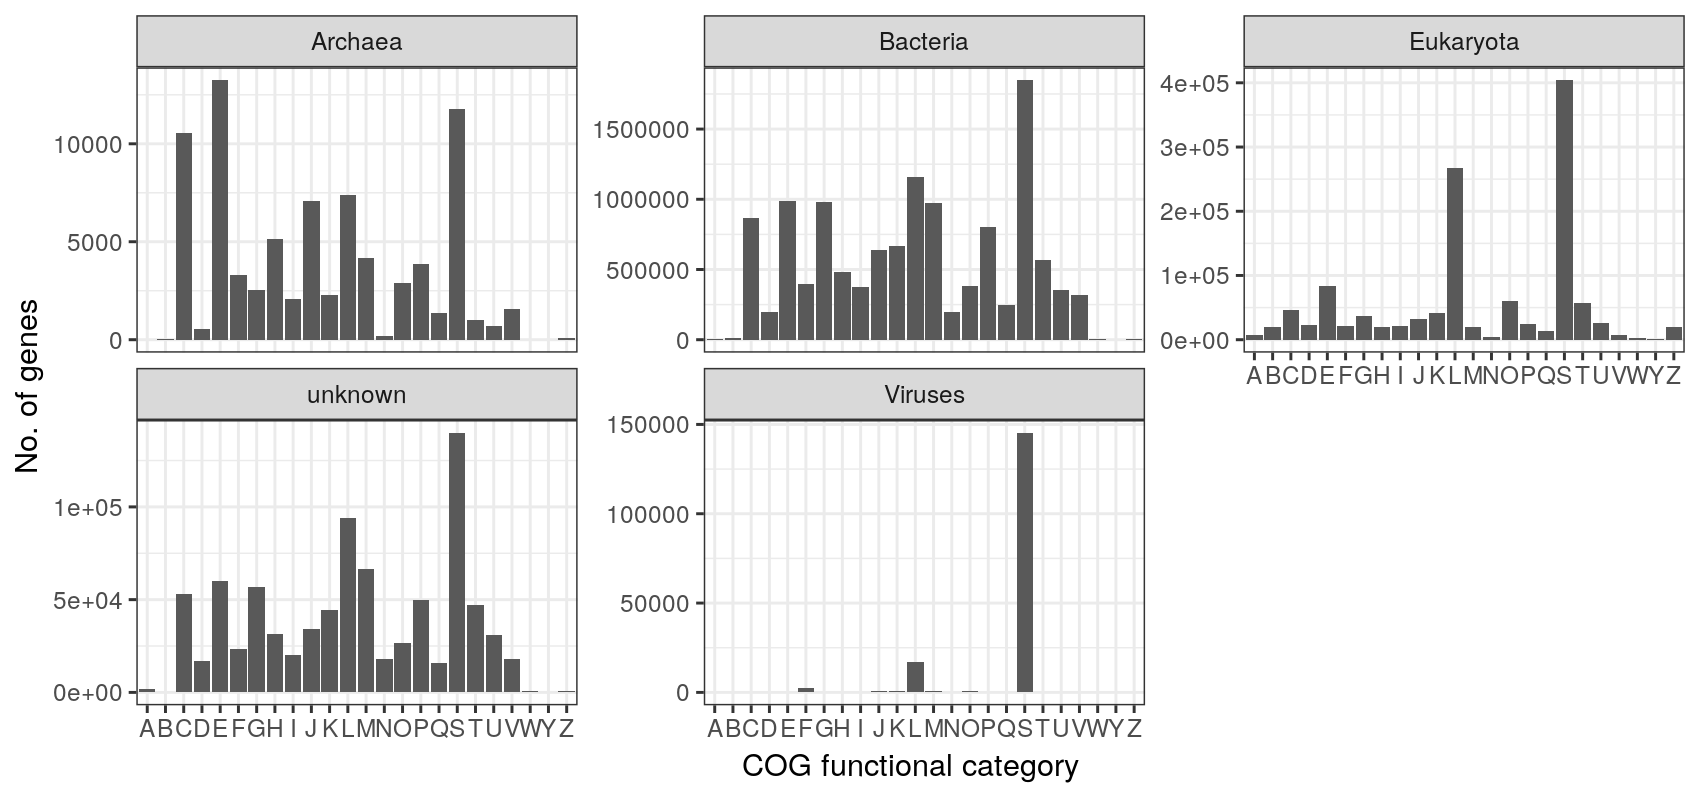

In [97]:
# plotting summary by domain
p = emap_annot_s_s %>%
    ggplot(aes(COG_func_cat, n)) +
    geom_bar(stat='identity') +
    facet_wrap(~ Domain, scales='free_y') +
    labs(x='COG functional category', y='No. of genes') +
    theme_bw()

p.dims(8.5,4)
plot(p)

In [98]:
# summarizing 
emap_annot_s_s = emap_annot_s %>%
    mutate(Domain = ifelse(Domain == '', 'unknown', Domain)) %>%
    group_by(COG_func_cat) %>%
    mutate(n_total = n(),
           perc_abund_total = n() / n_annot_seqs * 100) %>%
    group_by(COG_func_cat, Domain, Phylum, n_total, perc_abund_total) %>%
    summarize(n = n(),
              perc_abund = n() / n_annot_seqs * 100) %>%
    ungroup()

emap_annot_s_s

COG_func_cat Domain  Phylum                    n_total perc_abund_total
1    A            Archaea Candidatus Woesearchaeota 11920   0.08226525      
2    A            Archaea Euryarchaeota             11920   0.08226525      
⋮    ⋮            ⋮       ⋮                         ⋮       ⋮               
3433 Z            unknown NA                        28509   0.1967534       
3434 Z            Viruses unknown                   28509   0.1967534       
     n   perc_abund  
1    2   1.380289e-05
2    1   6.901447e-06
⋮    ⋮   ⋮           
3433 827 5.707497e-03
3434  10 6.901447e-05

File written: /ebio/abt3_projects/Georg_animal_feces/notebooks/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/04_assemblies/02_LLMGAG/.figures/ad8230af14cf362ed4e4786d295801cb.RDS 


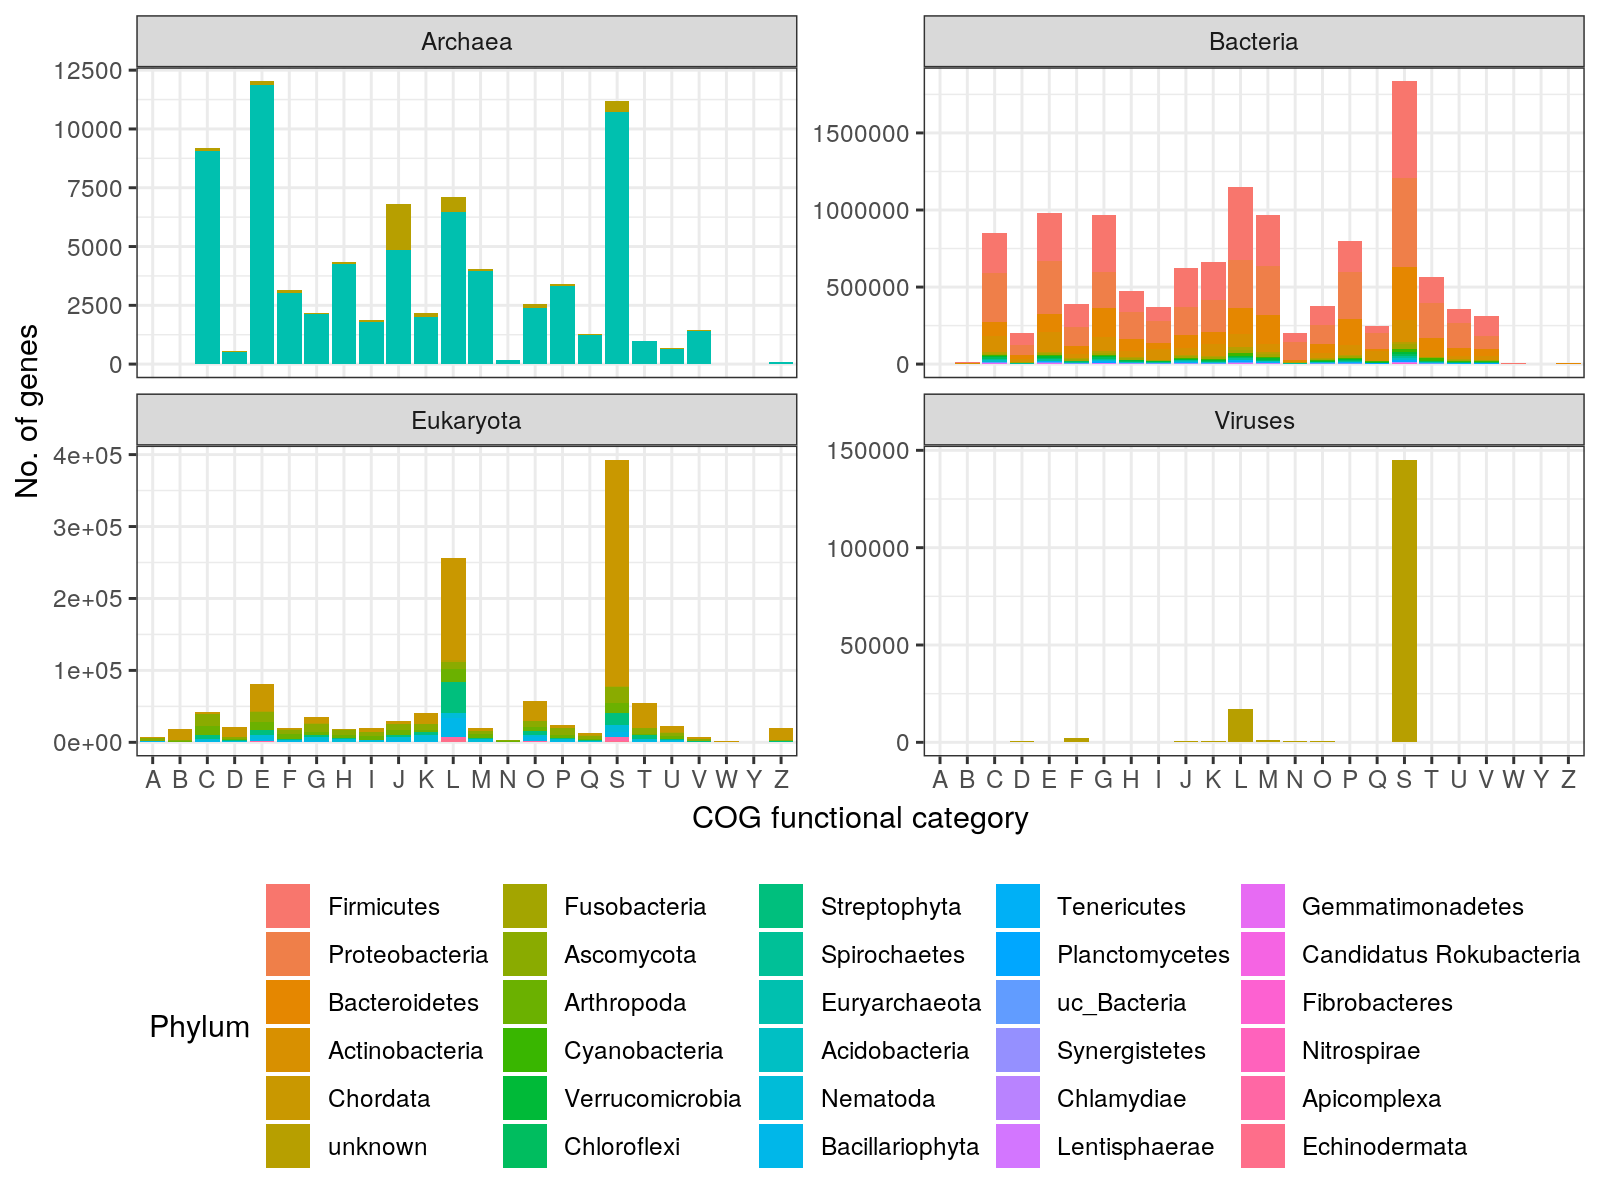

In [135]:
# plotting summary by phylum
p = emap_annot_s_s %>%
    filter(Domain != 'unknown',
           !is.na(Phylum)) %>%
    group_by(Phylum) %>%
    mutate(n_overall = sum(n, na.rm=TRUE)) %>%
    ungroup() %>%
    filter(n_overall >= 10000) %>%
    mutate(Phylum = Phylum %>% reorder(-n_overall)) %>%
    ggplot(aes(COG_func_cat, n, fill=Phylum)) +
    geom_bar(stat='identity') +
    facet_wrap(~ Domain, scales='free_y') +
    labs(x='COG functional category', y='No. of genes') +
    theme_bw() +
    theme(
        legend.position = 'bottom'
    )

p.dims(8,6)
Plot(p)

File written: /ebio/abt3_projects/Georg_animal_feces/notebooks/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/04_assemblies/02_LLMGAG/.figures/82296f2cf881a274bfd801658be1bdf8.RDS 


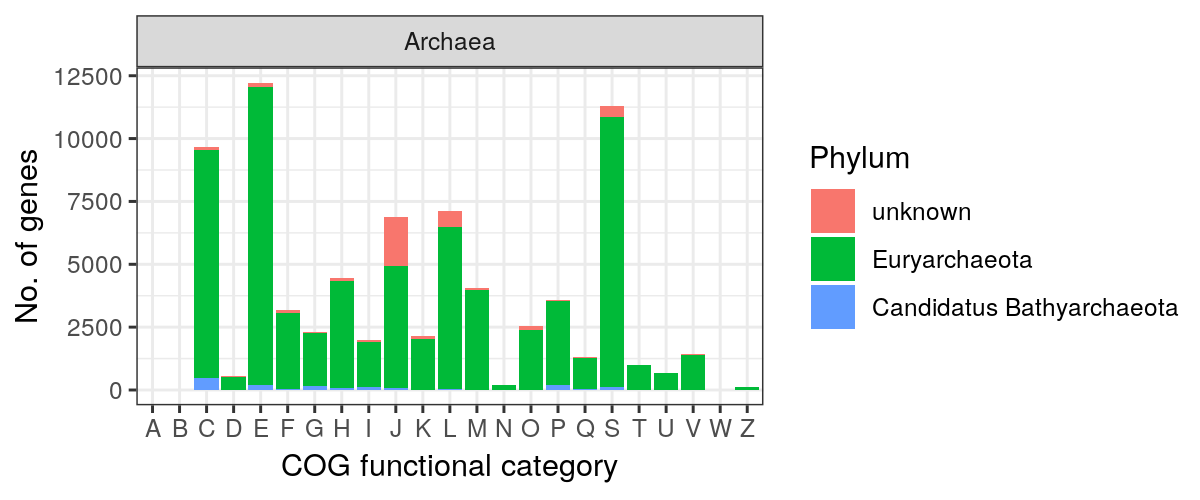

In [136]:
# plotting summary by phylum
p = emap_annot_s_s %>%
    filter(Domain != 'unknown',
           !is.na(Phylum)) %>%
    group_by(Phylum) %>%
    mutate(n_overall = sum(n, na.rm=TRUE)) %>%
    ungroup() %>%
    filter(n_overall >= 1000,
           Domain == 'Archaea') %>%
    mutate(Phylum = Phylum %>% reorder(-n_overall)) %>%
    ggplot(aes(COG_func_cat, n, fill=Phylum)) +
    geom_bar(stat='identity') +
    facet_wrap(~ Domain, scales='free_y') +
    labs(x='COG functional category', y='No. of genes') +
    theme_bw()

p.dims(6,2.5)
Plot(p)

File written: /ebio/abt3_projects/Georg_animal_feces/notebooks/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/04_assemblies/02_LLMGAG/.figures/4d1aa06da814f366090cdd64686796aa.RDS 


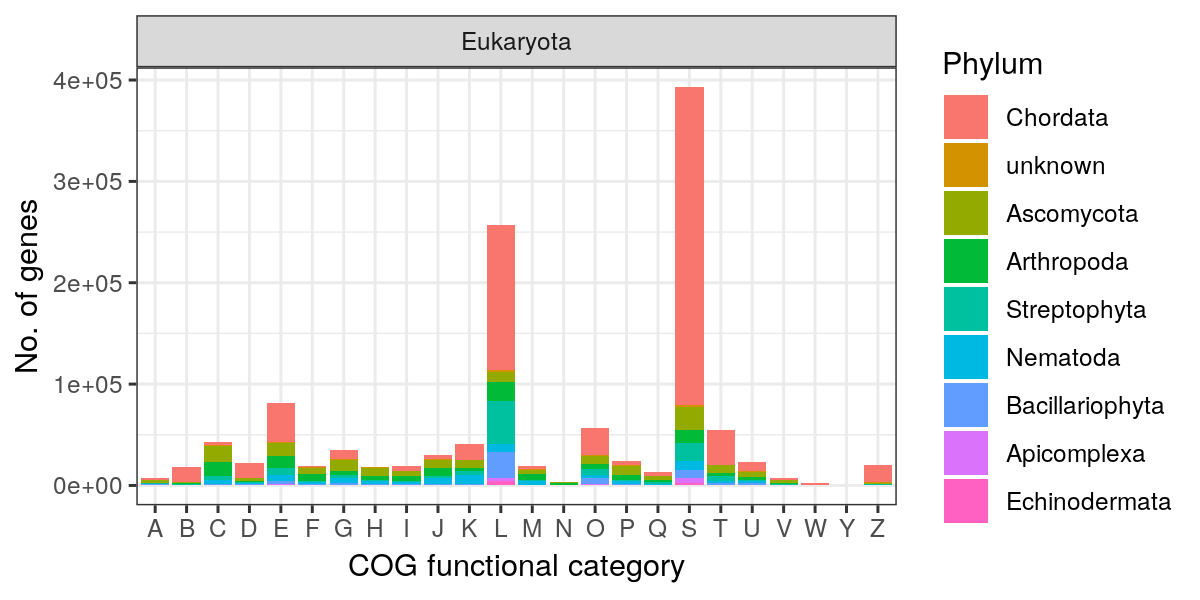

In [137]:
# plotting summary by phylum
p = emap_annot_s_s %>%
    filter(Domain != 'unknown',
           !is.na(Phylum)) %>%
    group_by(Phylum) %>%
    mutate(n_overall = sum(n, na.rm=TRUE)) %>%
    ungroup() %>%
    filter(n_overall >= 10000,
           Domain == 'Eukaryota') %>%
    mutate(Phylum = Phylum %>% reorder(-n_overall)) %>%
    ggplot(aes(COG_func_cat, n, fill=Phylum)) +
    geom_bar(stat='identity') +
    facet_wrap(~ Domain, scales='free_y') +
    labs(x='COG functional category', y='No. of genes') +
    theme_bw()

p.dims(6,3)
Plot(p)

In [ ]:
# plotting summary by phylum
p = emap_annot_s_s %>%
    filter(Domain != 'unknown',
           !is.na(Phylum)) %>%
    group_by(Phylum) %>%
    mutate(n_overall = sum(n, na.rm=TRUE)) %>%
    ungroup() %>%
    filter(n_overall >= 1000,
           Domain == 'Bacteria') %>%
    mutate(Phylum = Phylum %>% reorder(-n_overall)) %>%
    ggplot(aes(COG_func_cat, n, fill=Phylum)) +
    geom_bar(stat='identity') +
    facet_wrap(~ Domain, scales='free_y') +
    labs(x='COG functional category', y='No. of genes') +
    theme_bw()

p.dims(6,3)
Plot(p)

### KEGG pathway

In [138]:
# using kegg ptwy mapping file from humann2
ptwy_map_file = '/ebio/abt3_projects/databases_no-backup/humann2/utility_mapping/map_kegg-pwy_name_cat.txt.gz'
cmd = glue::glue('gunzip -c {file}', file=ptwy_map_file)
ptwy_map = fread(cmd=cmd, sep='\t', header=FALSE)
colnames(ptwy_map) = c('KEGG_Pathway_ID', 'Level1', 'Level2', 'KEGG_Pathway_Name')
ptwy_map 

Taking input= as a system command ('gunzip -c /ebio/abt3_projects/databases_no-backup/humann2/utility_mapping/map_kegg-pwy_name_cat.txt.gz') and a variable has been used in the expression passed to `input=`. Please use fread(cmd=...). There is a security concern if you are creating an app, and the app could have a malicious user, and the app is not running in a secure environment; e.g. the app is running as root. Please read item 5 in the NEWS file for v1.11.6 for more information and for the option to suppress this message.



KEGG_Pathway_ID Level1           Level2                       
1   ko01100         Metabolism       Global and overview maps     
2   ko01110         Metabolism       Global and overview maps     
⋮   ⋮               ⋮                ⋮                            
535 ko07114         Drug Development Skeleton-based classification
536 ko07117         Drug Development Skeleton-based classification
    KEGG_Pathway_Name                    
1   Metabolic pathways Major             
2   Biosynthesis of secondary metabolites
⋮   ⋮                                    
535 Naphthalene family                   
536 Benzodiazepine family

In [148]:
# parsing KEGG pathway
max_cat = emap_annot %>%
    distinct(KEGG_Pathway) %>%
    as_tibble %>%
    mutate(KEGG_Pathway = gsub(',map.+', '', KEGG_Pathway )) %>%
    as_tibble %>% .$KEGG_Pathway %>% unique %>% strsplit(',') %>%
    lapply(length) %>% unlist %>% max

emap_annot_s = emap_annot %>%
    dplyr::select(query_name, KEGG_Pathway) %>%
    as_tibble %>%
    mutate(KEGG_Pathway = KEGG_Pathway %>% gsub(',map.+', '', .)) %>%
    separate(KEGG_Pathway, gsub('^', 'X', 1:max_cat), sep=',') %>%
    gather(X, KEGG_Pathway, -query_name) %>%
    filter(!is.na(KEGG_Pathway),
           KEGG_Pathway != '') %>%
    dplyr::select(-X) %>%
    left_join(ptwy_map %>% as_tibble, c('KEGG_Pathway' = 'KEGG_Pathway_ID'))

emap_annot_s 

Warning message:
“Expected 110 pieces. Missing pieces filled with `NA` in 14489708 rows [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, ...].”


query_name                       KEGG_Pathway Level1        
1        ccd36888544d425e94e0f00251bfc239 ko00260      Metabolism    
2        3a6906a6df5143b1bdc7edb341c4d452 ko00550      Metabolism    
⋮        ⋮                                ⋮            ⋮             
21944771 ef307f5a2b43431d8952522fe2aa2b92 ko05418      Human Diseases
21944772 fdc314c76448453896e2b922c173b27a ko05418      Human Diseases
         Level2                            
1        Amino acid metabolism             
2        Glycan biosynthesis and metabolism
⋮        ⋮                                 
21944771 Cardiovascular disease            
21944772 Cardiovascular disease            
         KEGG_Pathway_Name                       
1        Glycine, serine and threonine metabolism
2        Peptidoglycan biosynthesis              
⋮        ⋮                                       
21944771 Fluid shear stress and atherosclerosis  
21944772 Fluid shear stress and atherosclerosis

File written: /ebio/abt3_projects/Georg_animal_feces/notebooks/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/04_assemblies/02_LLMGAG/.figures/7f9adbc08d4e4722782d3514894ec18b.RDS 


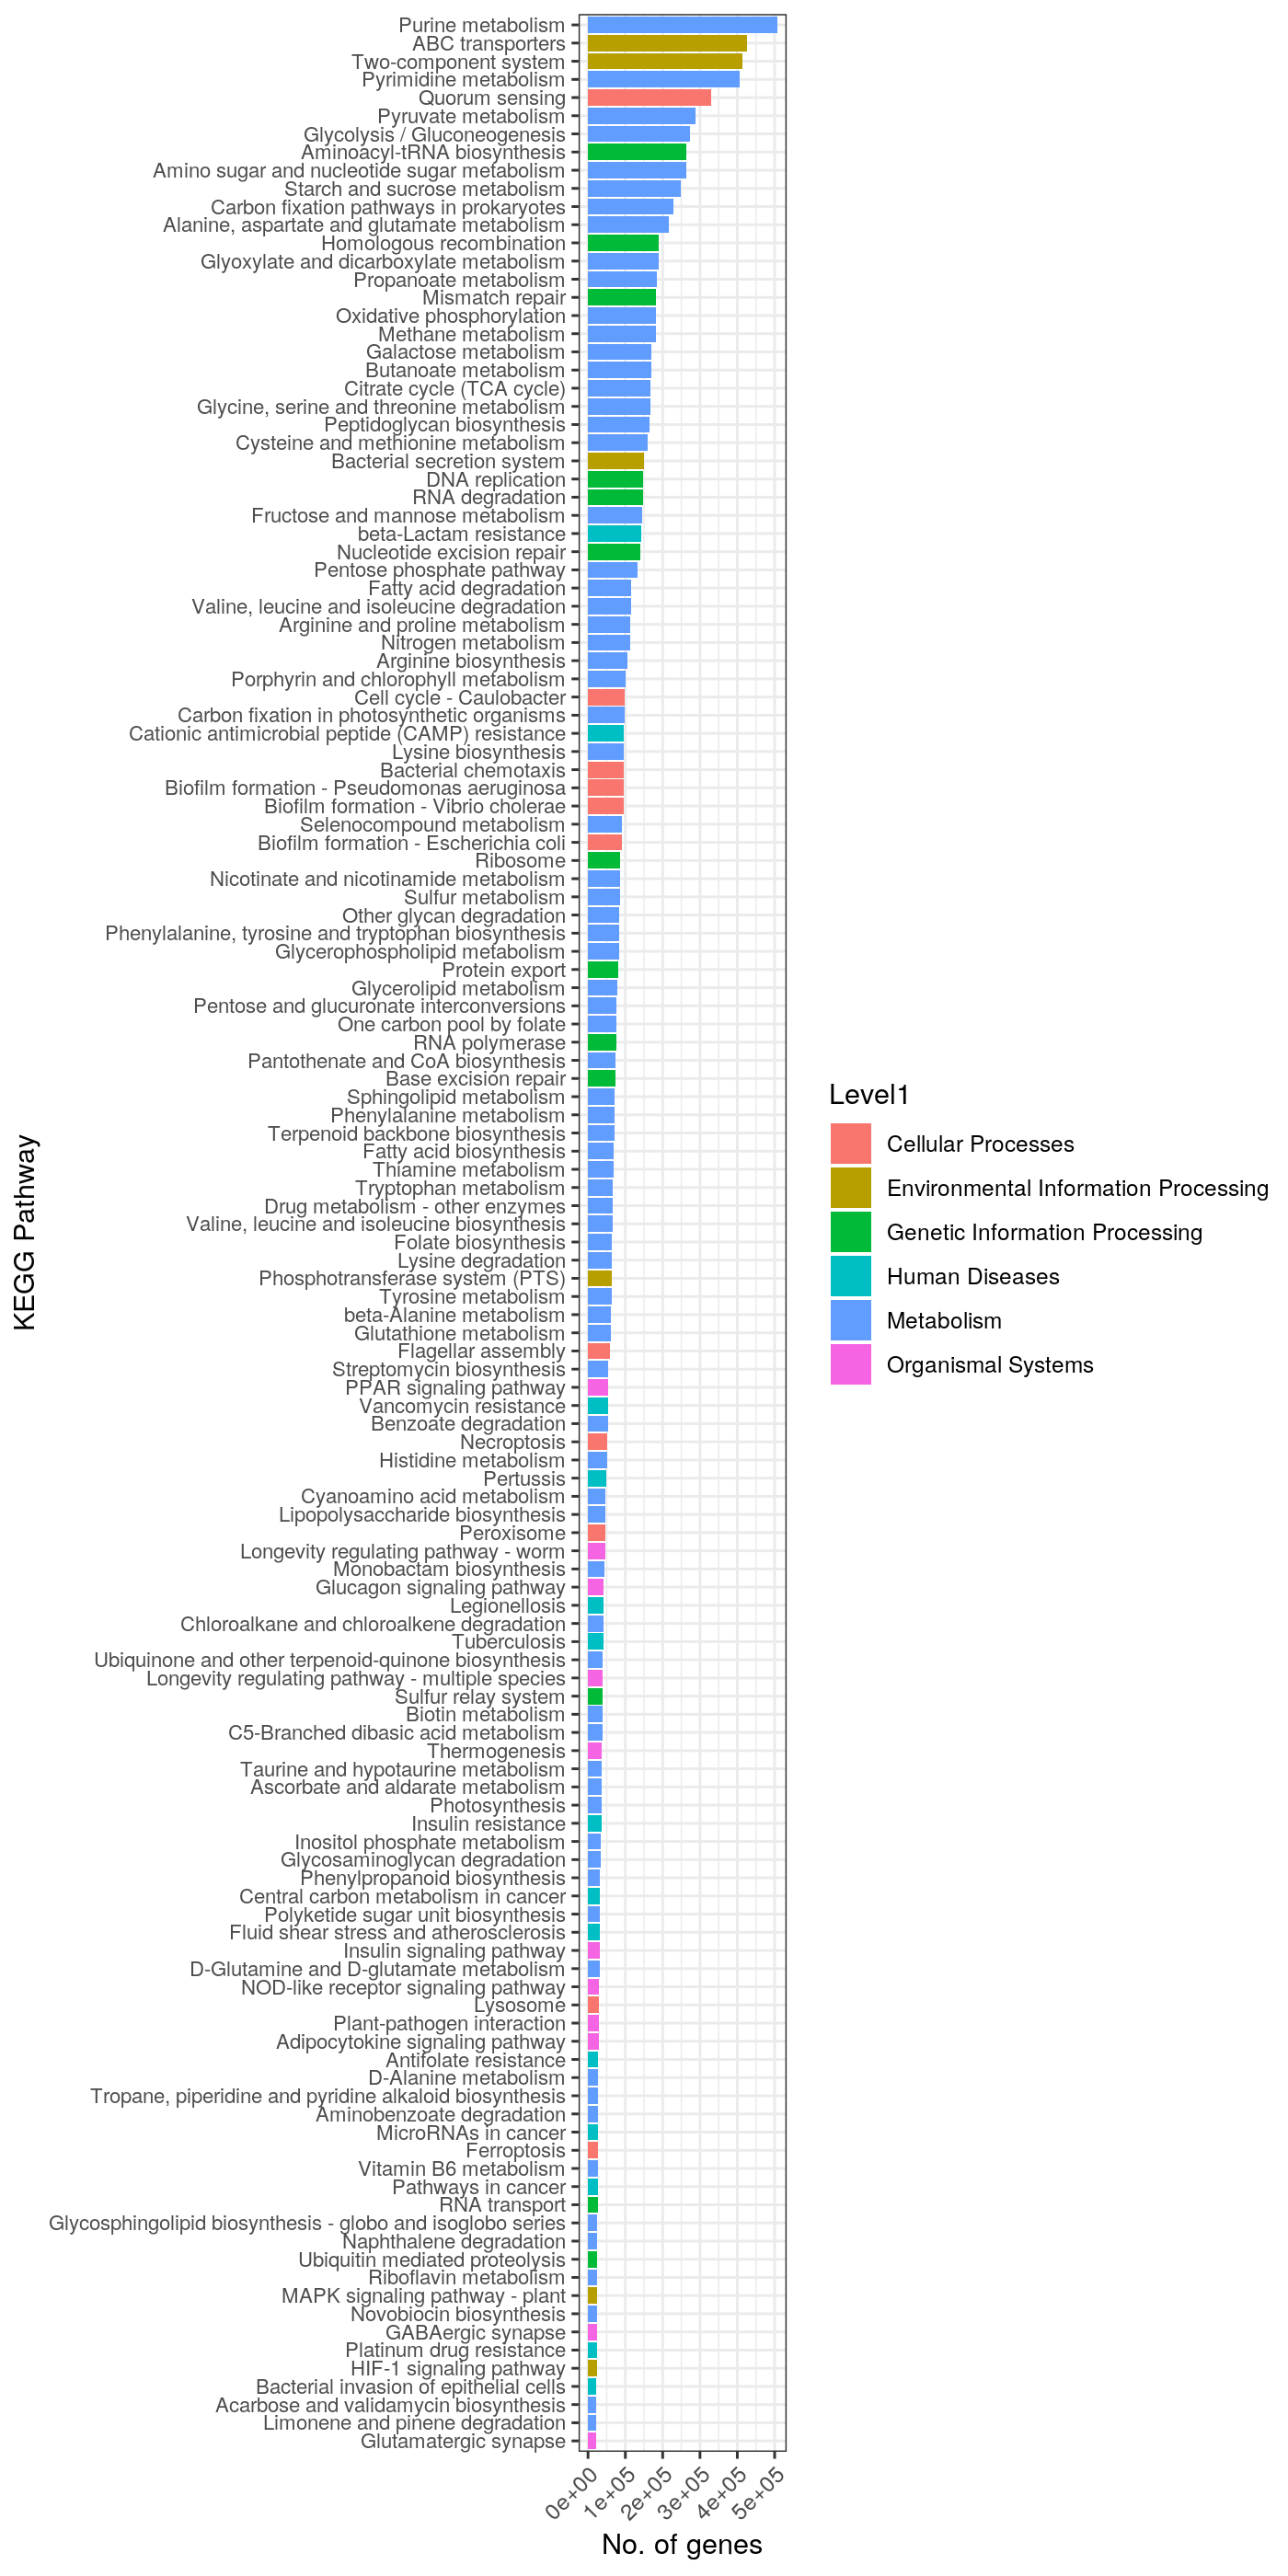

In [150]:
# plotting summary
p = emap_annot_s %>%
    filter(!is.na(KEGG_Pathway_Name),
           KEGG_Pathway_Name != '') %>%
    group_by(Level1, Level2, KEGG_Pathway_Name) %>%
    summarize(n = n()) %>%
    ungroup() %>%
    filter(n >= 20000,
           Level2 != 'Global and overview maps') %>%
    mutate(KEGG_Pathway_Name = KEGG_Pathway_Name %>% reorder(n)) %>%
    ggplot(aes(KEGG_Pathway_Name, n, fill=Level1)) +
    geom_bar(stat='identity') +
    labs(x='KEGG Pathway', y='No. of genes') +  
    theme_bw() +
    theme(
        axis.text.y = element_text(size=8),
        axis.text.x = element_text(angle=45, hjust=1)
    ) +
    coord_flip()

p.dims(7,14)
Plot(p)

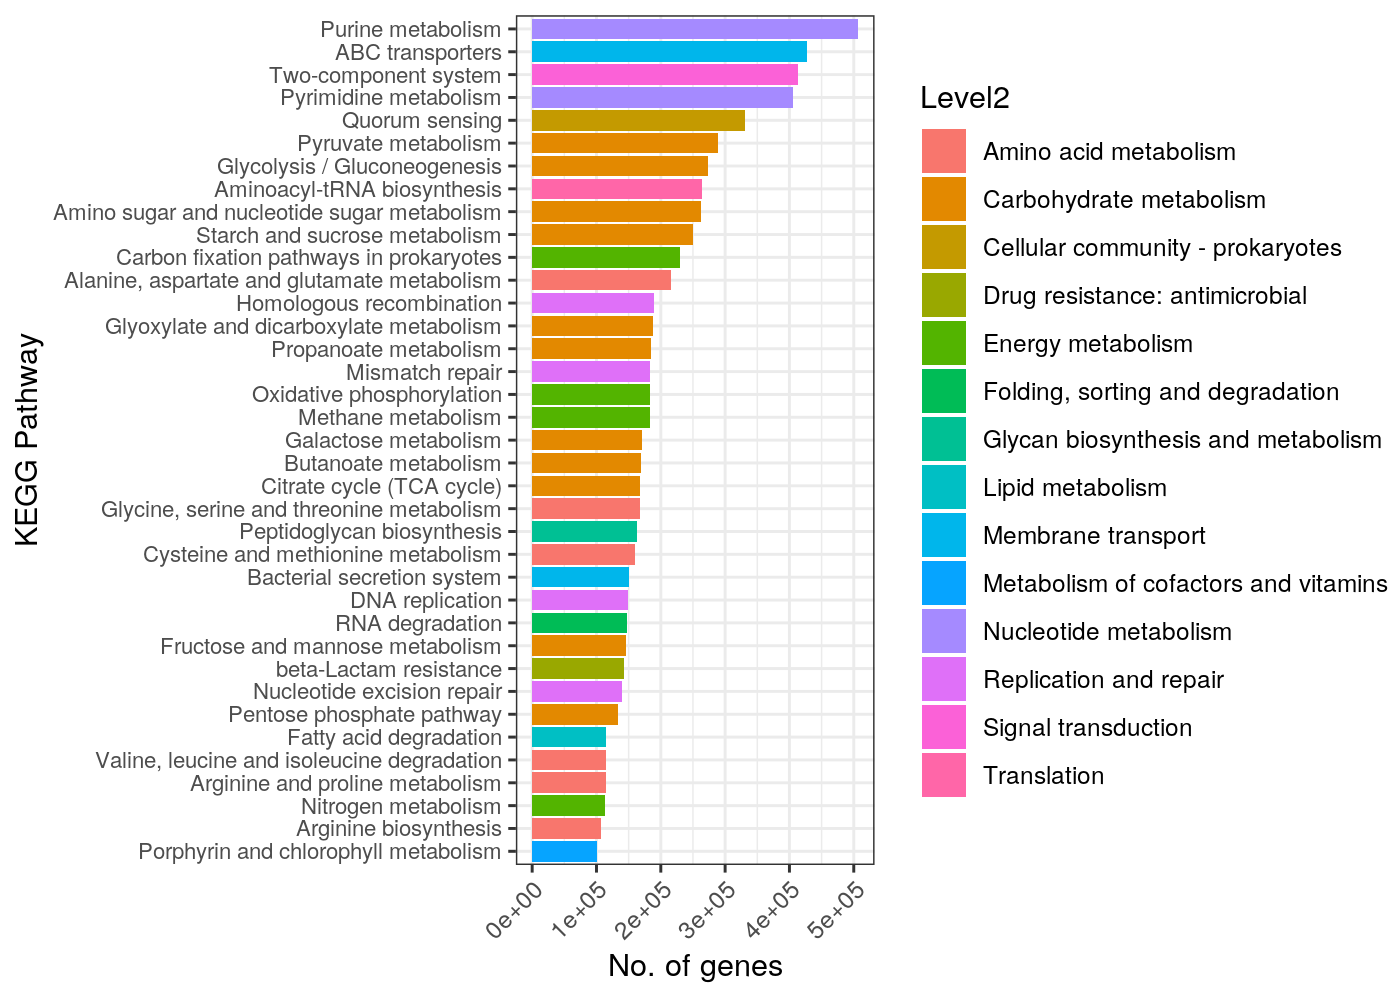

In [151]:
# plotting summary
p = emap_annot_s %>%
    filter(!is.na(KEGG_Pathway_Name),
           KEGG_Pathway_Name != '') %>%
    group_by(Level1, Level2, KEGG_Pathway_Name) %>%
    summarize(n = n()) %>%
    ungroup() %>%
    filter(n >= 100000,
           Level2 != 'Global and overview maps') %>%
    mutate(KEGG_Pathway_Name = KEGG_Pathway_Name %>% reorder(n)) %>%
    ggplot(aes(KEGG_Pathway_Name, n, fill=Level2)) +
    geom_bar(stat='identity') +
    labs(x='KEGG Pathway', y='No. of genes') +  
    theme_bw() +
    theme(
        axis.text.y = element_text(size=8),
        axis.text.x = element_text(angle=45, hjust=1)
    ) +
    coord_flip()

p.dims(7,5)
Plot(p)

#### By taxonomy

In [152]:
# parsing KEGG pathway
max_cat = emap_annot %>%
    distinct(KEGG_Pathway) %>%
    as_tibble %>%
    mutate(KEGG_Pathway = gsub(',map.+', '', KEGG_Pathway )) %>%
    as_tibble %>% .$KEGG_Pathway %>% unique %>% strsplit(',') %>%
    lapply(length) %>% unlist %>% max

emap_annot_s = emap_annot %>%
    dplyr::select(query_name, KEGG_Pathway) %>%
    as_tibble %>%
    mutate(KEGG_Pathway = KEGG_Pathway %>% gsub(',map.+', '', .)) %>%
    separate(KEGG_Pathway, gsub('^', 'X', 1:max_cat), sep=',') %>%
    gather(X, KEGG_Pathway, -query_name) %>%
    filter(!is.na(KEGG_Pathway),
           KEGG_Pathway != '') %>%
    dplyr::select(-X) %>%
    left_join(ptwy_map, c('KEGG_Pathway' = 'KEGG_Pathway_ID')) %>%
    left_join(tax %>% as_tibble, c('query_name'='seqID')) 

emap_annot_s

Warning message:
“Expected 110 pieces. Missing pieces filled with `NA` in 14489708 rows [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, ...].”


query_name                       KEGG_Pathway Level1        
1        ccd36888544d425e94e0f00251bfc239 ko00260      Metabolism    
2        3a6906a6df5143b1bdc7edb341c4d452 ko00550      Metabolism    
⋮        ⋮                                ⋮            ⋮             
21944771 ef307f5a2b43431d8952522fe2aa2b92 ko05418      Human Diseases
21944772 fdc314c76448453896e2b922c173b27a ko05418      Human Diseases
         Level2                            
1        Amino acid metabolism             
2        Glycan biosynthesis and metabolism
⋮        ⋮                                 
21944771 Cardiovascular disease            
21944772 Cardiovascular disease            
         KEGG_Pathway_Name                        taxID   rank   
1        Glycine, serine and threonine metabolism 2013744 species
2        Peptidoglycan biosynthesis               1797185 species
⋮        ⋮                                        ⋮       ⋮      
21944771 Fluid shear stress and atherosclerosis   1437183 no rank
21944772 Fluid shear stress and atherosclerosis   1437183 no rank
         spp                                                      Domain   
1        Deltaproteobacteria bacterium HGW-Deltaproteobacteria-17 Bacteria 
2        Acidobacteria bacterium RIFCSPLOWO2_02_FULL_68_18        Bacteria 
⋮        ⋮                                                        ⋮        
21944771 Mesangiospermae                                          Eukaryota
21944772 Mesangiospermae                                          Eukaryota
         Kingdom       Phylum         Class               Order   Family 
1        unknown       Proteobacteria Deltaproteobacteria unknown unknown
2        unknown       Acidobacteria  unknown             unknown unknown
⋮        ⋮             ⋮              ⋮                   ⋮       ⋮      
21944771 Viridiplantae Streptophyta   unknown             unknown unknown
21944772 Viridiplantae Streptophyta   unknown             unknown unknown
         Genus   Species                                                 
1        unknown Deltaproteobacteria bacterium HGW-Deltaproteobacteria-17
2        unknown Acidobacteria bacterium RIFCSPLOWO2_02_FULL_68_18       
⋮        ⋮       ⋮                                                       
21944771 unknown unknown                                                 
21944772 unknown unknown

File written: /ebio/abt3_projects/Georg_animal_feces/notebooks/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/04_assemblies/02_LLMGAG/.figures/42f8f819b6e1f96dc8085e0b09a30b57.RDS 


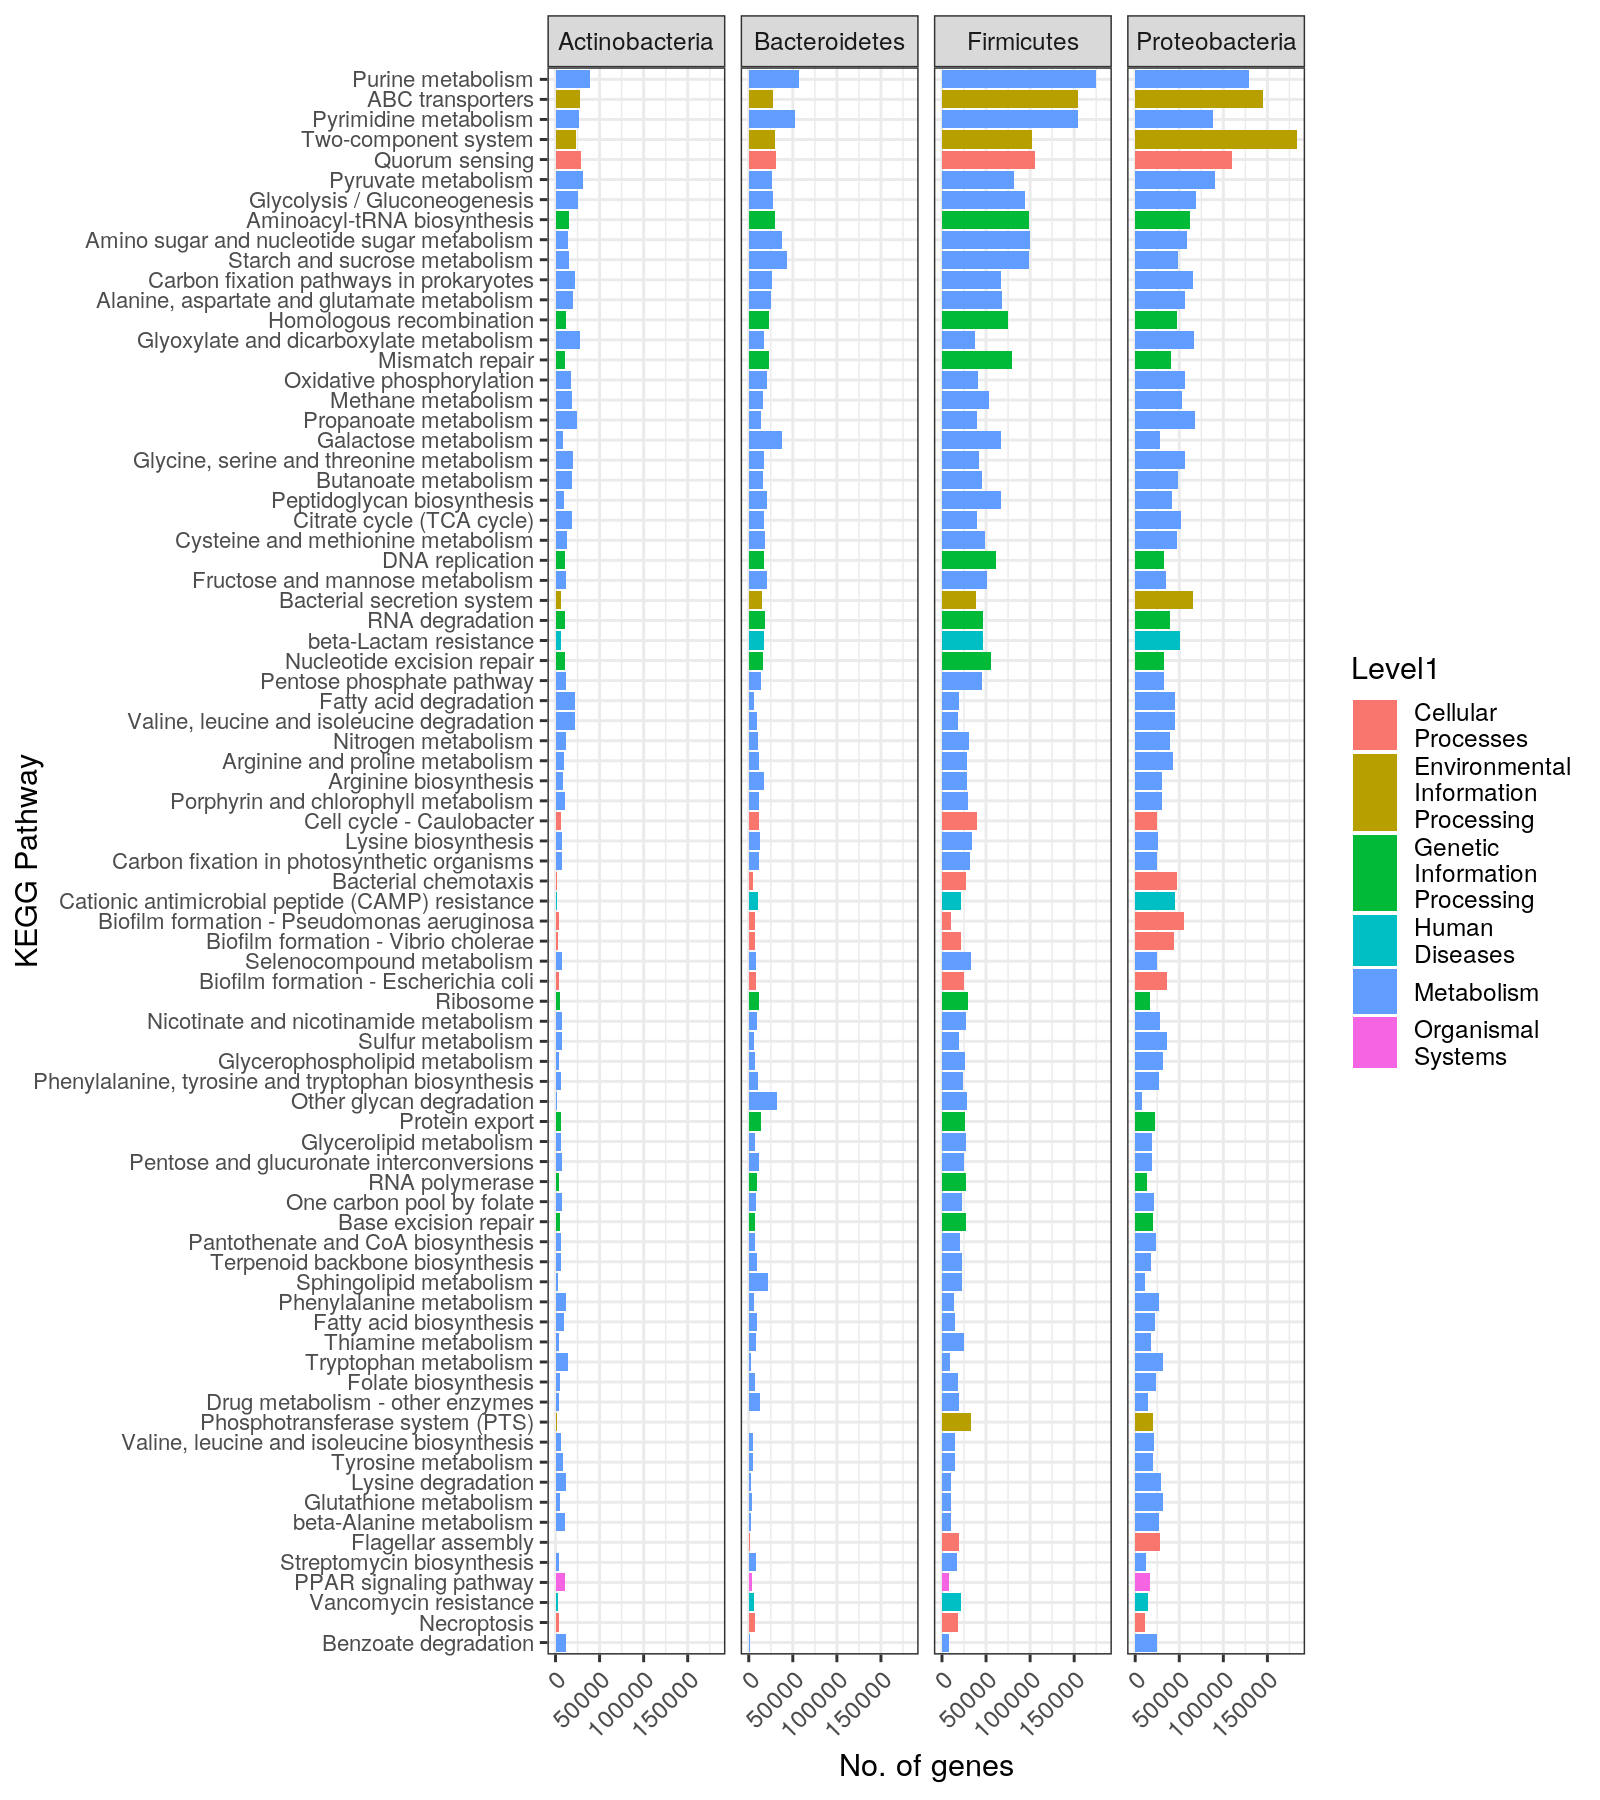

In [161]:
# plotting summary
p = emap_annot_s %>%
    filter(!is.na(KEGG_Pathway_Name),
           KEGG_Pathway_Name != '') %>%
    mutate(Phylum = ifelse(is.na(Phylum), 'unknown', Phylum)) %>%
    filter(Phylum != 'unknown') %>%
    group_by(Phylum) %>%
    mutate(n_per_tax = n()) %>%
    ungroup() %>%
    group_by(KEGG_Pathway_Name) %>%
    mutate(n_per_ptwy = n()) %>%
    ungroup() %>%
    filter(n_per_tax >= 500000,
           n_per_ptwy >= 50000) %>%
    group_by(Phylum, Level1, Level2, KEGG_Pathway_Name, n_per_ptwy) %>%
    summarize(n = n()) %>%
    ungroup() %>%
    filter(Level2 != 'Global and overview maps') %>%
    mutate(Level1 = stringr::str_wrap(Level1, 10),
           KEGG_Pathway_Name = KEGG_Pathway_Name %>% reorder(n_per_ptwy)) %>%
    ggplot(aes(KEGG_Pathway_Name, n, fill=Level1)) +
    geom_bar(stat='identity') +
    labs(x='KEGG Pathway', y='No. of genes') +  
    facet_grid(. ~ Phylum) +
    theme_bw() +
    theme(
        axis.text.y = element_text(size=8),
        axis.text.x = element_text(angle=45, hjust=1)
    ) +
    coord_flip()

p.dims(8,9)
Plot(p)

##### Archaea

File written: /ebio/abt3_projects/Georg_animal_feces/notebooks/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/04_assemblies/02_LLMGAG/.figures/a62d5ffdd2c515037909f4824dc1d72c.RDS 


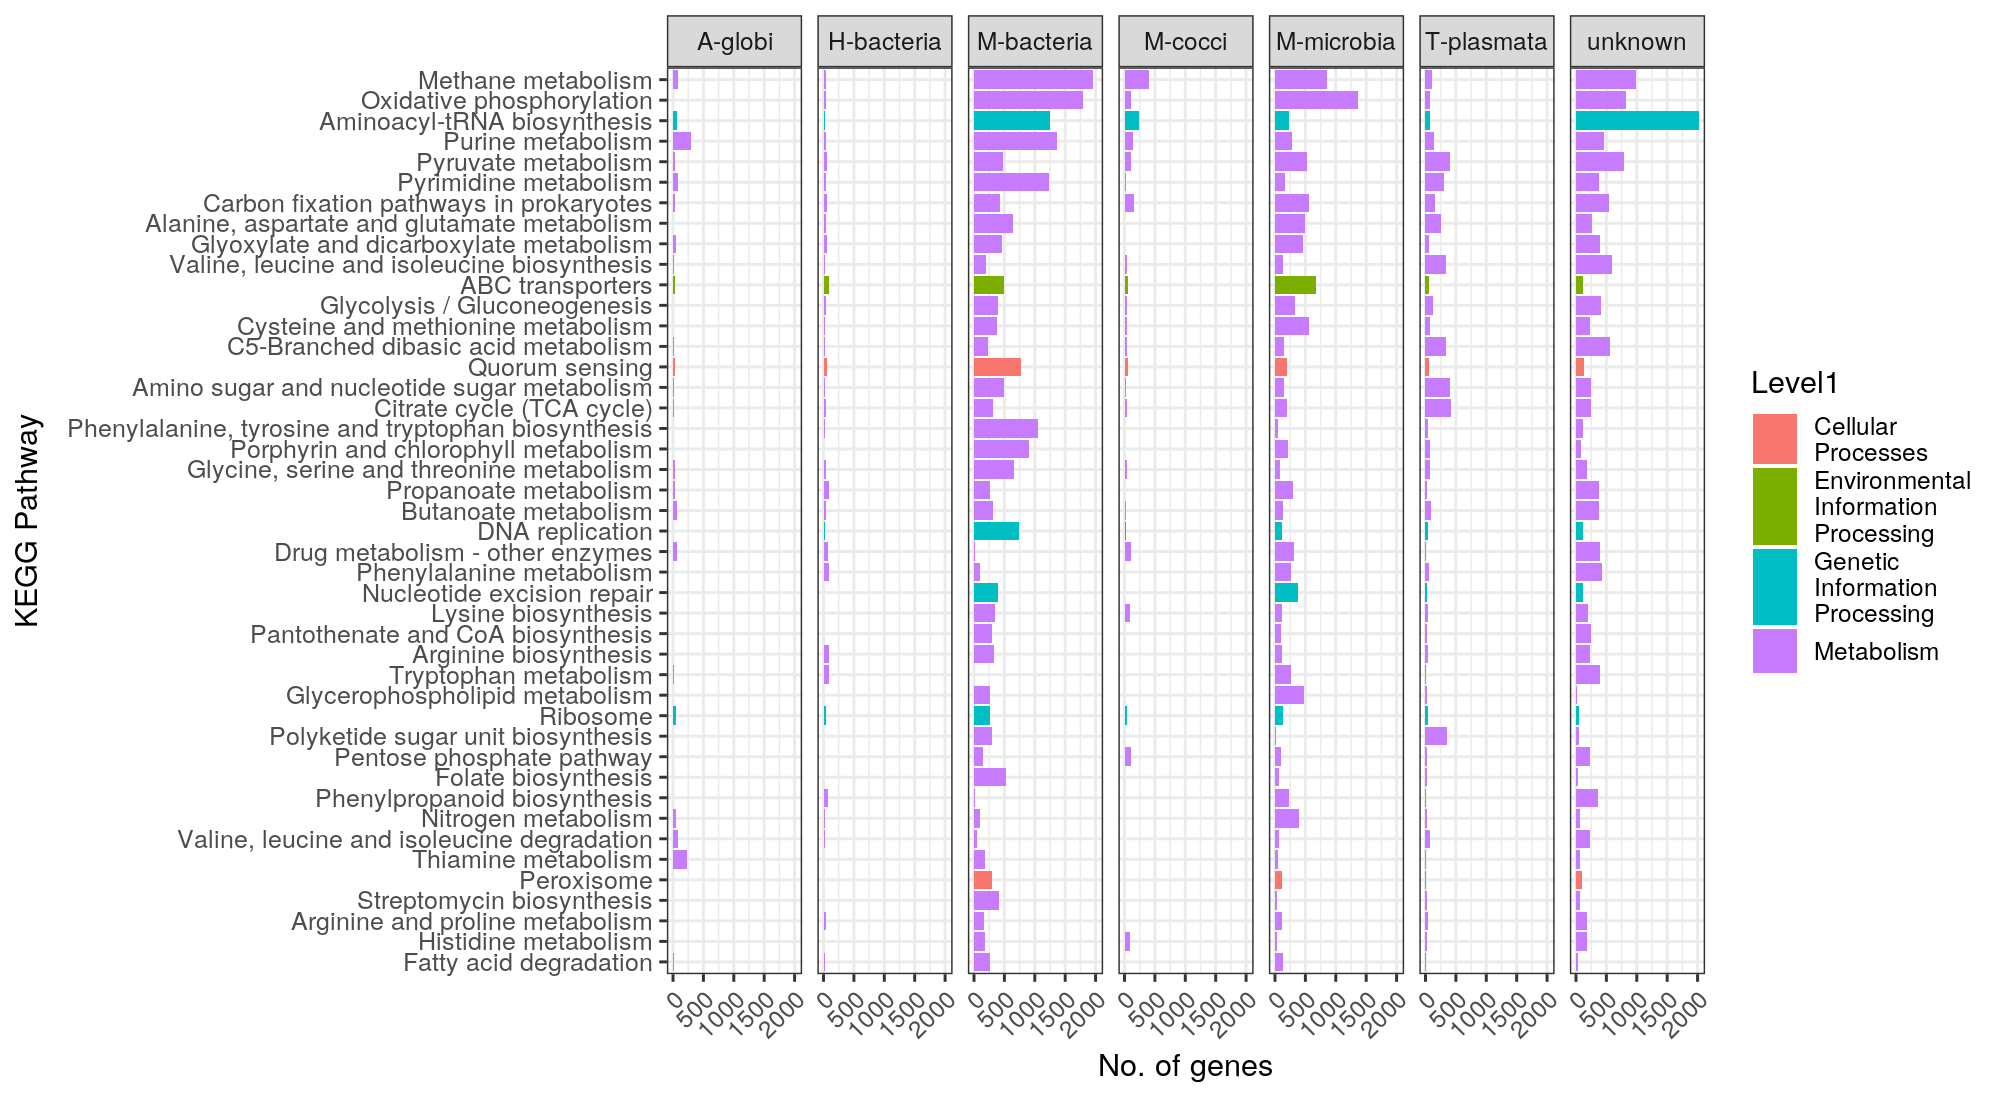

In [174]:
# plotting summary
#arch = c('Crenarchaeota', 'Euryarchaeota', 'Thaumarchaeota')
arch = c('Euryarchaeota')
p = emap_annot_s %>%
    filter(!is.na(KEGG_Pathway_Name),
           KEGG_Pathway_Name != '',
           Level2 != 'Global and overview maps',
           Domain == 'Archaea') %>%
    group_by(Class) %>%
    mutate(n_per_tax = n()) %>%
    ungroup() %>%
    group_by(KEGG_Pathway_Name) %>%
    mutate(n_per_ptwy = n()) %>%
    ungroup() %>%
    filter(n_per_tax >= 2000,
           n_per_ptwy >= 500) %>%
    group_by(Phylum, Class, Genus, Level1, Level2, KEGG_Pathway_Name, n_per_ptwy) %>%
    summarize(n = n()) %>%
    ungroup() %>%
    mutate(Level1 = stringr::str_wrap(Level1, 10),
           Class = gsub('Methano', 'M-', Class),
           Class = gsub('Halo', 'H-', Class),
           Class = gsub('Thermo', 'T-', Class),
           Class = gsub('Archaeo', 'A-', Class),
           KEGG_Pathway_Name = KEGG_Pathway_Name %>% reorder(n_per_ptwy)) %>%
    ggplot(aes(KEGG_Pathway_Name, n, fill=Level1)) +
    geom_bar(stat='identity') +
    labs(x='KEGG Pathway', y='No. of genes') +  
    facet_grid(. ~ Class) +
    theme_bw() +
    theme(
        axis.text.y = element_text(size=9),
        axis.text.x = element_text(angle=45, hjust=1)
    ) +
    coord_flip()

p.dims(10,5.5)
Plot(p)

##### Euryarchaea

File written: /ebio/abt3_projects/Georg_animal_feces/notebooks/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/04_assemblies/02_LLMGAG/.figures/9ef227d4ccc80a4a11c215251edaeaba.RDS 


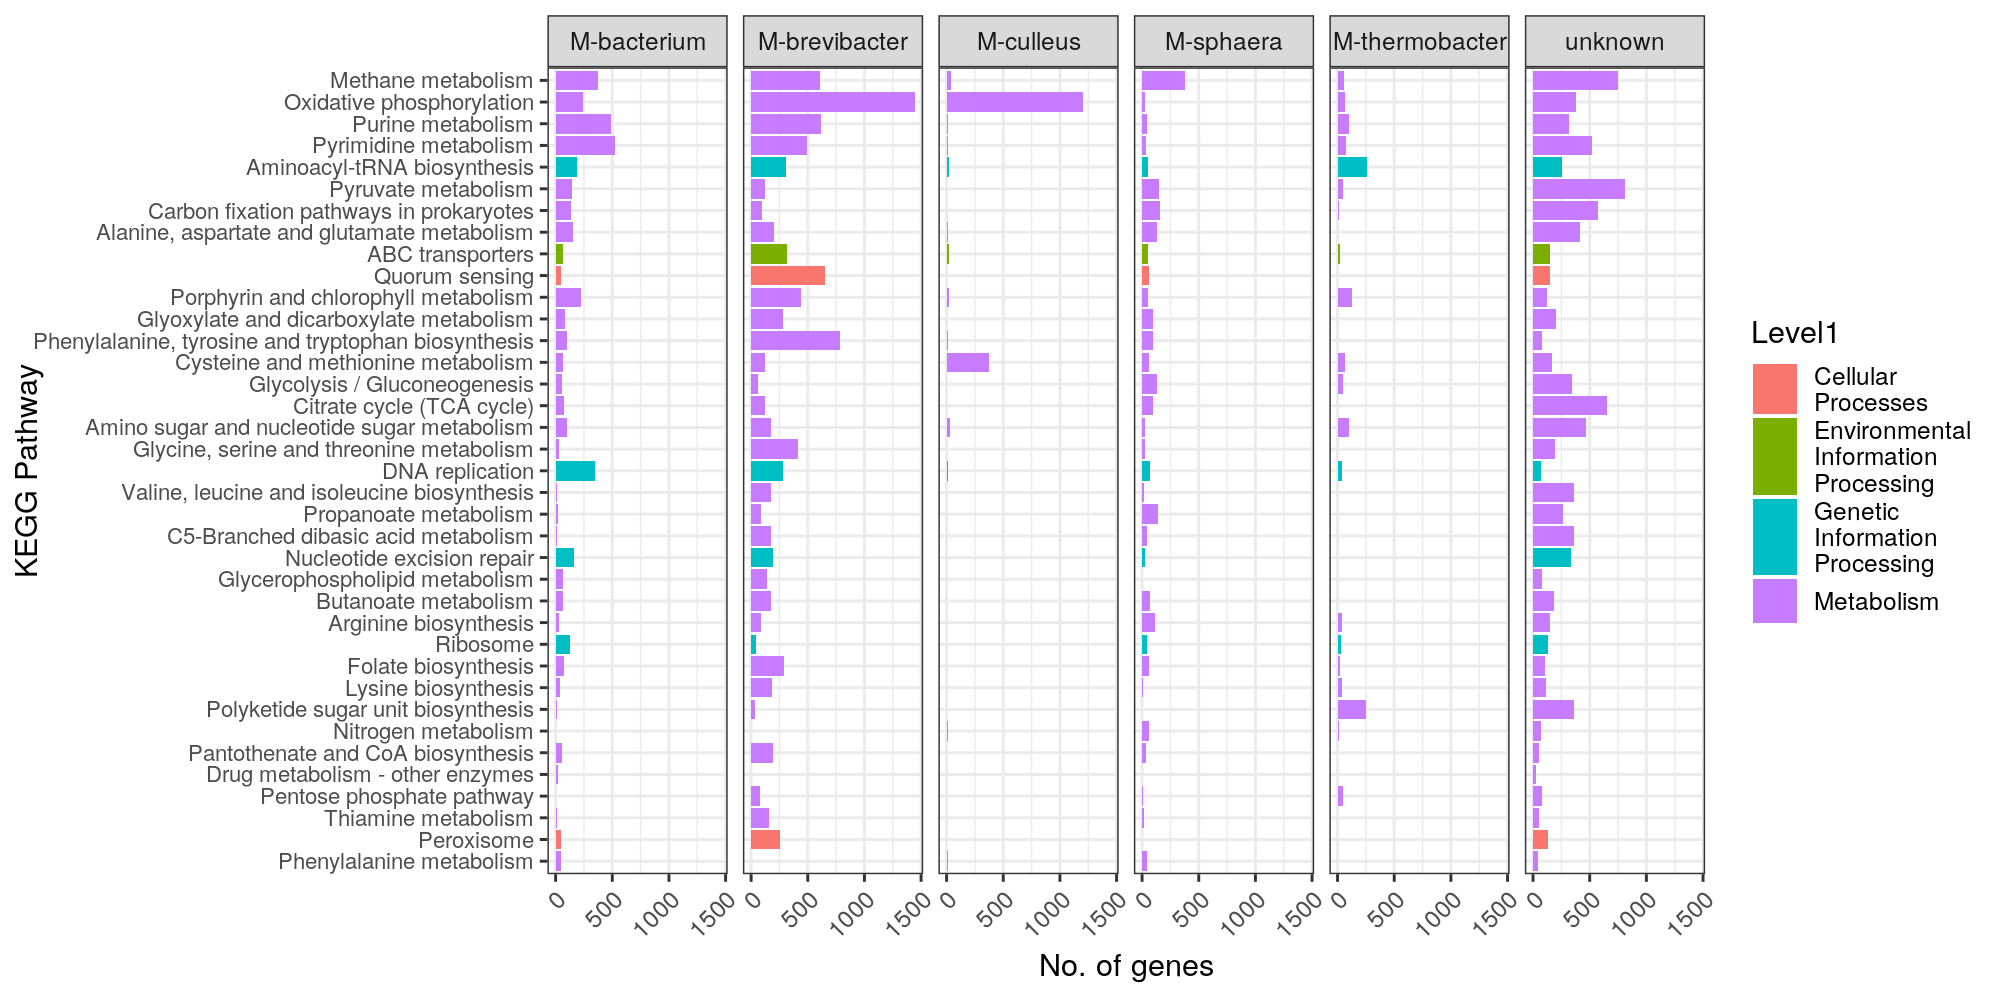

In [167]:
# plotting summary
arch = c('Euryarchaeota')
p = emap_annot_s %>%
    filter(!is.na(KEGG_Pathway_Name),
           KEGG_Pathway_Name != '',
           Level2 != 'Global and overview maps',
           Phylum %in% arch) %>%
    group_by(Genus) %>%
    mutate(n_per_tax = n()) %>%
    ungroup() %>%
    group_by(KEGG_Pathway_Name) %>%
    mutate(n_per_ptwy = n()) %>%
    ungroup() %>%
    filter(n_per_tax >= 2000,
           n_per_ptwy >= 500) %>%
    group_by(Phylum, Genus, Level1, Level2, KEGG_Pathway_Name, n_per_ptwy) %>%
    summarize(n = n()) %>%
    ungroup() %>%
    mutate(Genus = gsub('Methano', 'M-', Genus),
           Level1 = stringr::str_wrap(Level1, 10),
           KEGG_Pathway_Name = KEGG_Pathway_Name %>% reorder(n_per_ptwy)) %>%
    ggplot(aes(KEGG_Pathway_Name, n, fill=Level1)) +
    geom_bar(stat='identity') +
    labs(x='KEGG Pathway', y='No. of genes') +  
    facet_grid(. ~ Genus) +
    theme_bw() +
    theme(
        axis.text.y = element_text(size=8),
        axis.text.x = element_text(angle=45, hjust=1)
    ) +
    coord_flip()

p.dims(10,5)
Plot(p)

##### Christensenellaceae

File written: /ebio/abt3_projects/Georg_animal_feces/notebooks/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/04_assemblies/02_LLMGAG/.figures/fba26807034edd0af64ace6b795b0ca7.RDS 


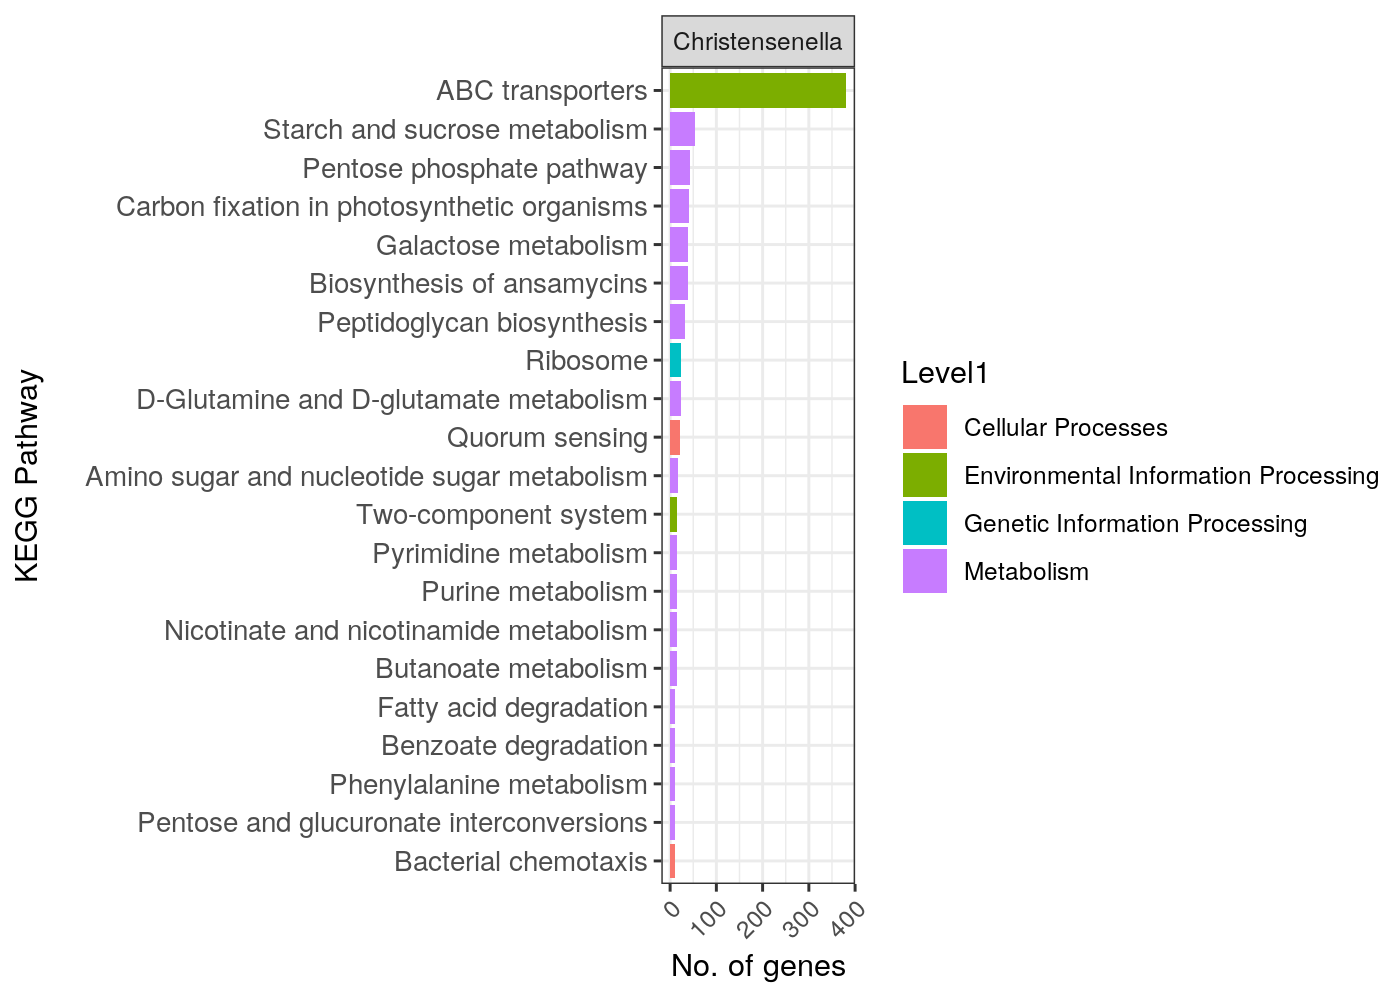

In [176]:
# plotting summary
to_keep = c('Christensenellaceae')
p = emap_annot_s %>%
    filter(!is.na(KEGG_Pathway_Name),
           KEGG_Pathway_Name != '',
           Level2 != 'Global and overview maps',
           Family %in% to_keep) %>%
    group_by(Genus) %>%
    mutate(n_per_tax = n()) %>%
    ungroup() %>%
    group_by(KEGG_Pathway_Name) %>%
    mutate(n_per_ptwy = n()) %>%
    ungroup() %>%
    filter(n_per_tax >= 10,
           n_per_ptwy >= 10) %>%
    group_by(Phylum, Genus, Level1, Level2, KEGG_Pathway_Name, n_per_ptwy) %>%
    summarize(n = n()) %>%
    ungroup() %>%
    mutate(KEGG_Pathway_Name = KEGG_Pathway_Name %>% reorder(n_per_ptwy)) %>%
    ggplot(aes(KEGG_Pathway_Name, n, fill=Level1)) +
    geom_bar(stat='identity') +
    labs(x='KEGG Pathway', y='No. of genes') +  
    facet_grid(. ~ Genus) +
    theme_bw() +
    theme(
        axis.text.y = element_text(size=10),
        axis.text.x = element_text(angle=45, hjust=1)
    ) +
    coord_flip()

p.dims(7,5)
Plot(p)

### CAZy

In [177]:
# summarizing 
max_cat = emap_annot %>%
    distinct(CAZy) %>% as_tibble %>%
    .$CAZy %>% strsplit(',') %>% 
    lapply(length) %>% unlist %>% max

emap_annot_s = emap_annot %>%
    dplyr::select(query_name, CAZy) %>%
    as_tibble() %>%
    separate(CAZy, LETTERS[1:max_cat], sep=',') %>%
    gather(X, CAZy, -query_name) %>%
    filter(!is.na(CAZy),
           CAZy != '') %>%
    dplyr::select(-X)  

emap_annot_s

Warning message:
“Expected 7 pieces. Missing pieces filled with `NA` in 14489713 rows [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, ...].”


query_name                       CAZy
1      af559fa098b0421e8379295df754504c GT5 
2      c9dd0be8c06c4540ae2ae77ff0fcddc0 GT4 
⋮      ⋮                                ⋮   
528508 0c4715256d1546e49dfc583adfef58df GH9 
528509 1c3d2e1fa78d4a5cb5042e99b4e059f2 GH9

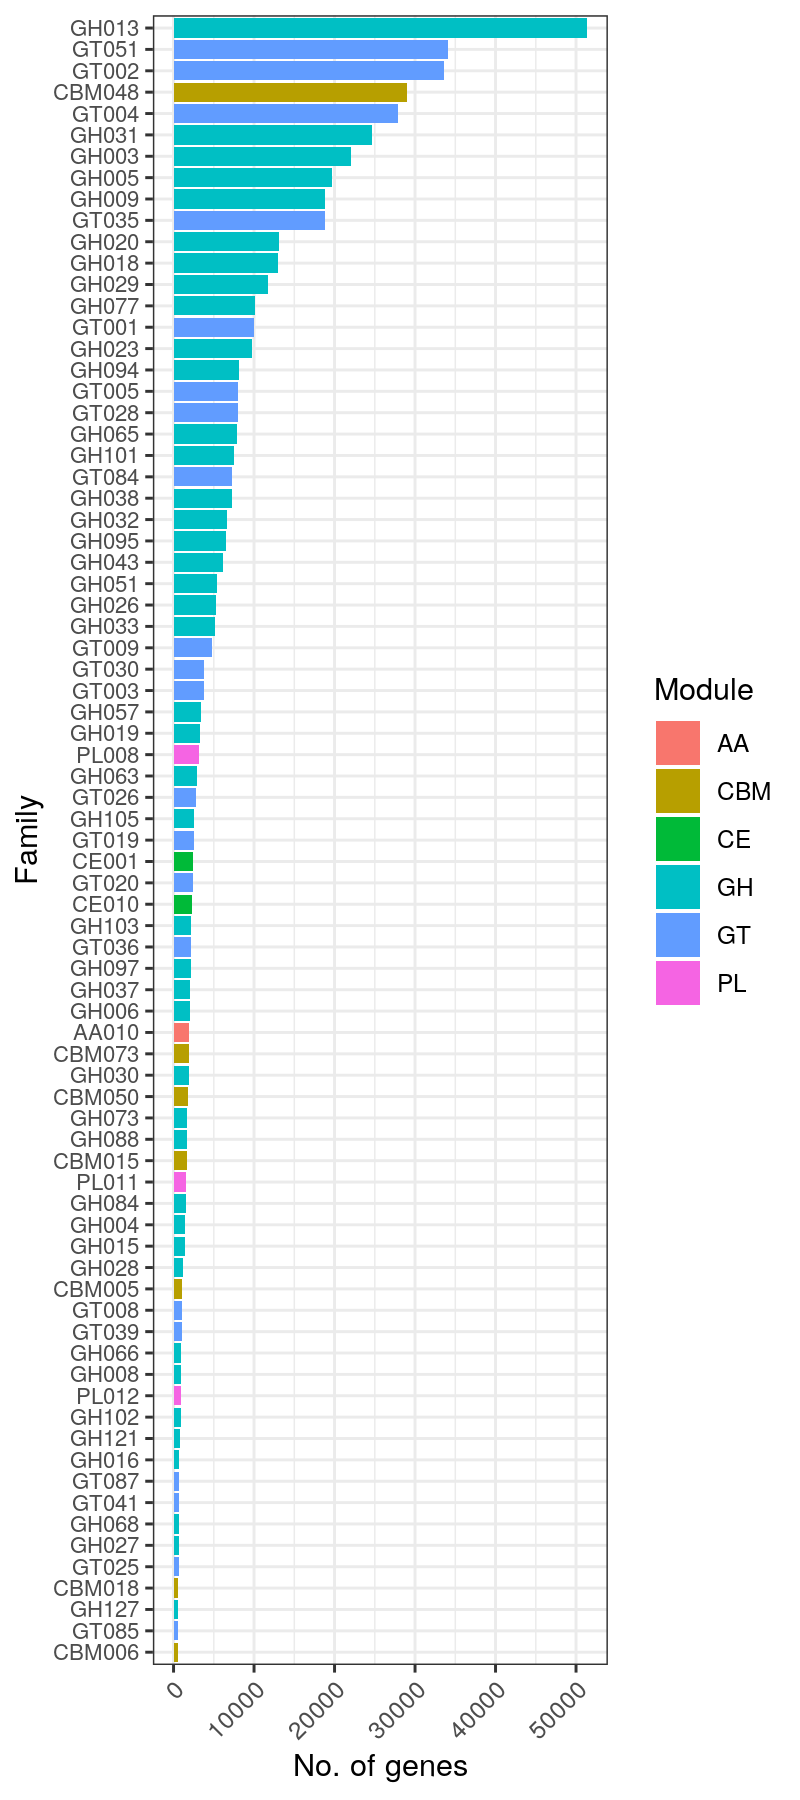

In [181]:
# plotting summary
p = emap_annot_s %>%
    group_by(CAZy) %>%
    summarize(n = n()) %>%
    ungroup() %>%
    filter(n >= 500) %>%
    mutate(Module = gsub('[0-9]+$', '', CAZy),
           CAZy = gsub('^([^0-9]+)([0-9])$', '\\10\\2', CAZy),
           CAZy = gsub('^([^0-9]+)([0-9][0-9])$', '\\10\\2', CAZy)) %>%
    mutate(CAZy = CAZy %>% reorder(n)) %>%
    ggplot(aes(CAZy, n, fill=Module)) +
    geom_bar(stat='identity') +
    labs(x='Family', y='No. of genes') +  
    theme_bw() +
    theme(
        axis.text.y = element_text(size=8),
        axis.text.x = element_text(angle=45, hjust=1)
    ) +
    coord_flip()

p.dims(4,9)
plot(p)

#### By taxonomy

In [189]:
# summarizing 
max_cat = emap_annot %>%
    distinct(CAZy) %>% as_tibble %>%
    .$CAZy %>% strsplit(',') %>% 
    lapply(length) %>% unlist %>% max

emap_annot_s = emap_annot %>%
    dplyr::select(query_name, CAZy) %>%
    as_tibble %>%
    separate(CAZy, LETTERS[1:max_cat], sep=',') %>%
    gather(X, CAZy, -query_name) %>%
    filter(!is.na(CAZy),
           CAZy != '') %>%
    dplyr::select(-X) 

emap_annot_s 

Warning message:
“Expected 7 pieces. Missing pieces filled with `NA` in 14489713 rows [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, ...].”


query_name                       CAZy
1      af559fa098b0421e8379295df754504c GT5 
2      c9dd0be8c06c4540ae2ae77ff0fcddc0 GT4 
⋮      ⋮                                ⋮   
528508 0c4715256d1546e49dfc583adfef58df GH9 
528509 1c3d2e1fa78d4a5cb5042e99b4e059f2 GH9

In [190]:
# Joining with taxonomy
emap_annot_s = emap_annot_s %>%
    left_join(tax %>% as_tibble, c('query_name'='seqID'))
    
emap_annot_s

query_name                       CAZy taxID   rank   
1      af559fa098b0421e8379295df754504c GT5  2005714 species
2      c9dd0be8c06c4540ae2ae77ff0fcddc0 GT4  1978231 species
⋮      ⋮                                ⋮    ⋮       ⋮      
528508 0c4715256d1546e49dfc583adfef58df GH9  397288  species
528509 1c3d2e1fa78d4a5cb5042e99b4e059f2 GH9  397288  species
       spp                           Domain   Kingdom Phylum        Class     
1      bacterium BMS3Abin06          Bacteria unknown unknown       unknown   
2      Acidobacteria bacterium       Bacteria unknown Acidobacteria unknown   
⋮      ⋮                             ⋮        ⋮       ⋮             ⋮         
528508 Lachnospiraceae bacterium 3-1 Bacteria unknown Firmicutes    Clostridia
528509 Lachnospiraceae bacterium 3-1 Bacteria unknown Firmicutes    Clostridia
       Order         Family          Genus   Species                      
1      unknown       unknown         unknown bacterium BMS3Abin06         
2      unknown       unknown         unknown Acidobacteria bacterium      
⋮      ⋮             ⋮               ⋮       ⋮                            
528508 Clostridiales Lachnospiraceae unknown Lachnospiraceae bacterium 3-1
528509 Clostridiales Lachnospiraceae unknown Lachnospiraceae bacterium 3-1

File written: /ebio/abt3_projects/Georg_animal_feces/notebooks/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/04_assemblies/02_LLMGAG/.figures/339791f9db4d1810e34f76d36c40ff33.RDS 


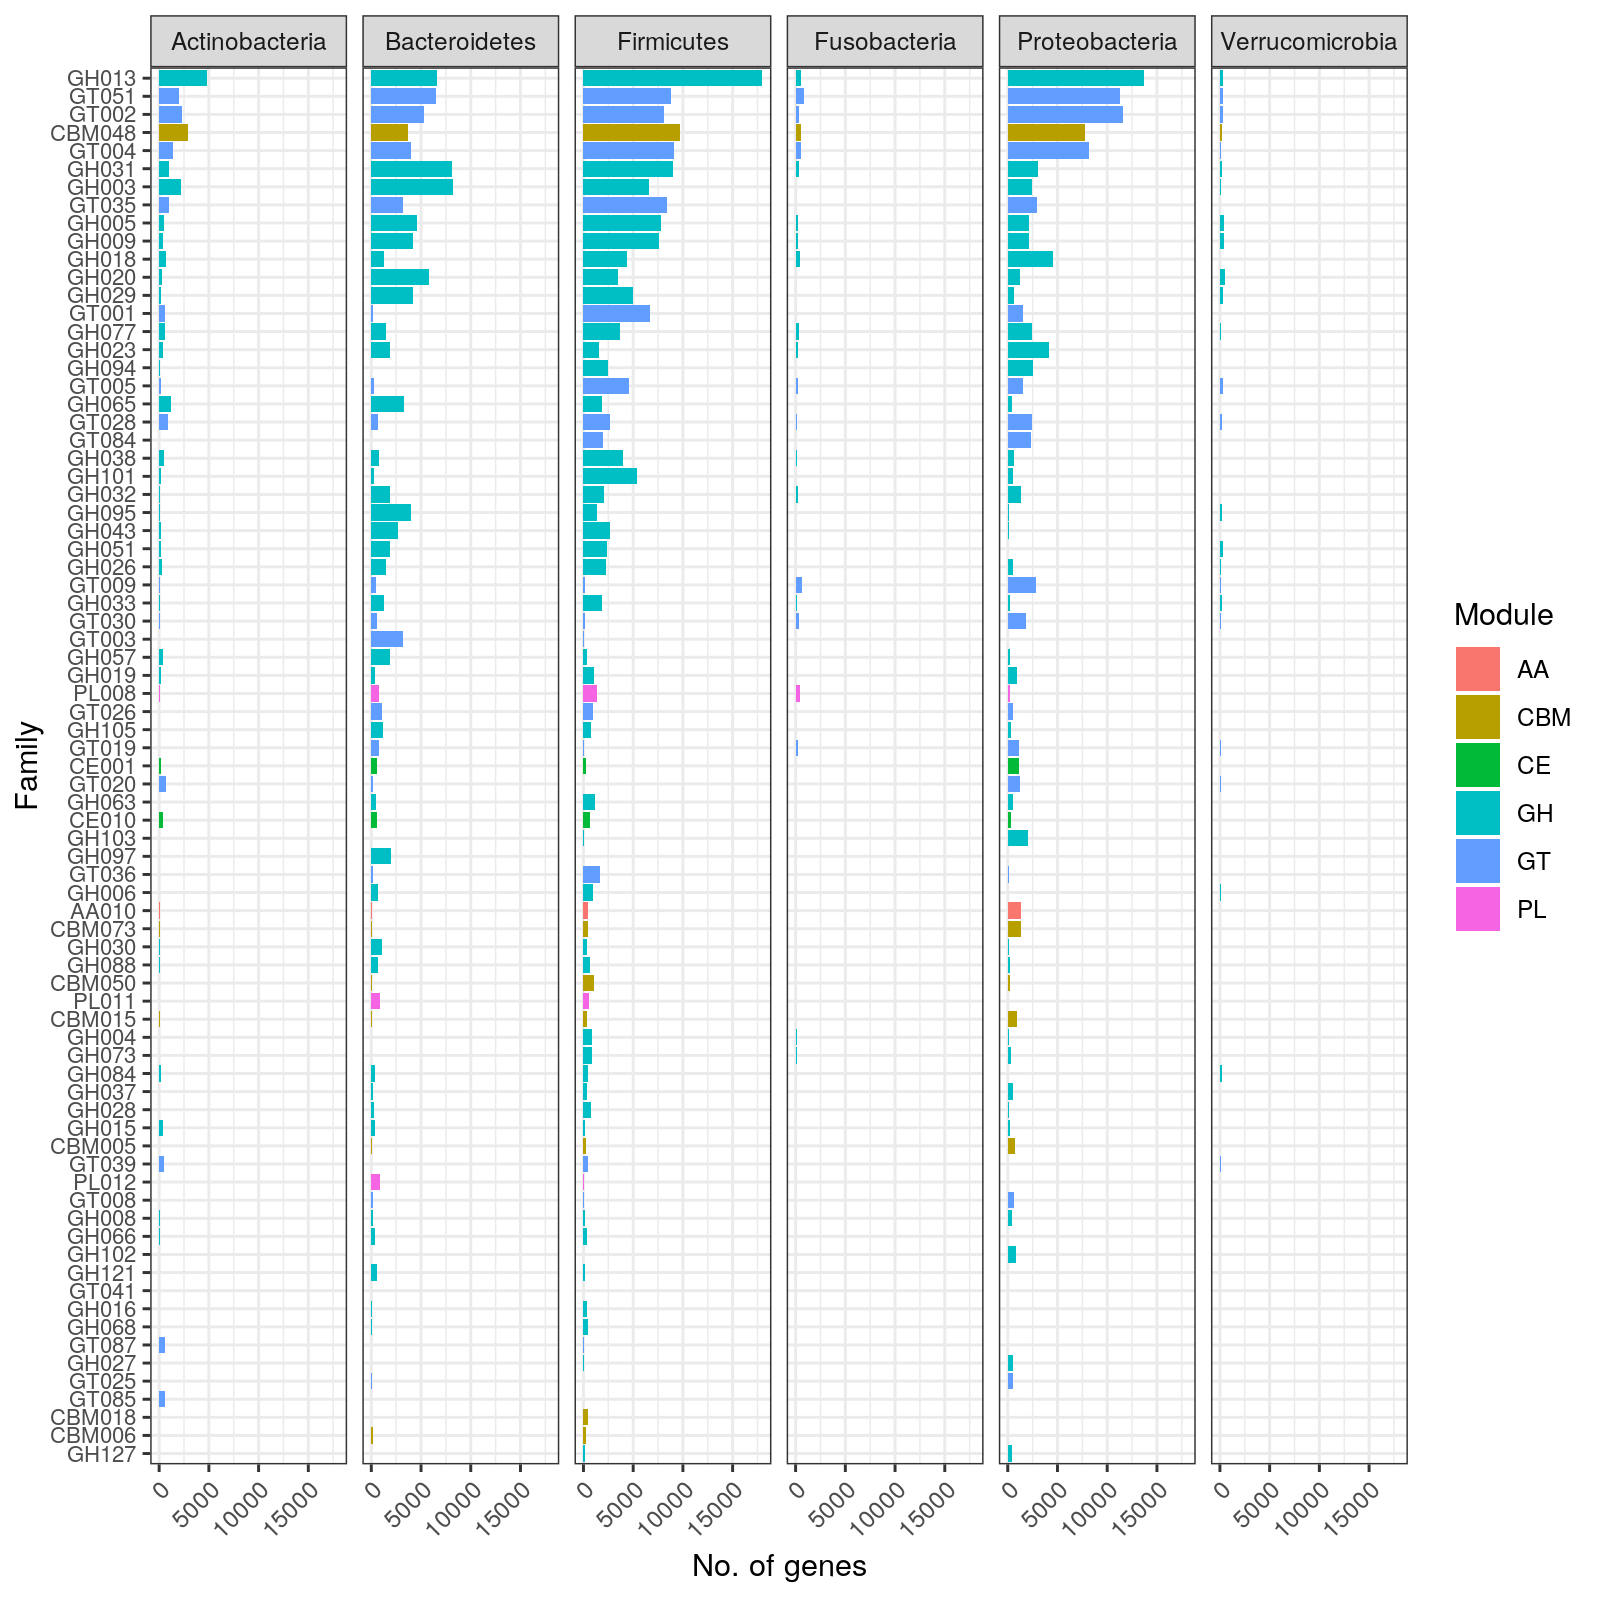

In [194]:
# plotting summary
p = emap_annot_s %>%
    mutate(Phylum = ifelse(is.na(Phylum), 'unknown', Phylum)) %>%
    filter(Phylum != 'unknown') %>%
    group_by(Phylum) %>%
    mutate(n_per_tax = n()) %>%
    group_by(CAZy) %>%
    mutate(n_per_CAZy = n()) %>%
    ungroup() %>%
    filter(n_per_tax >= 5000,
           n_per_CAZy >= 500) %>%
    group_by(Phylum, CAZy, n_per_CAZy) %>%
    summarize(n = n()) %>%
    ungroup() %>%
    mutate(Module = gsub('[0-9]+$', '', CAZy),
           CAZy = gsub('^([^0-9]+)([0-9])$', '\\10\\2', CAZy),
           CAZy = gsub('^([^0-9]+)([0-9][0-9])$', '\\10\\2', CAZy)) %>%
    mutate(CAZy = CAZy %>% reorder(n_per_CAZy)) %>%
    ggplot(aes(CAZy, n, fill=Module)) +
    geom_bar(stat='identity') +
    labs(x='Family', y='No. of genes') +  
    facet_grid(. ~ Phylum) +
    theme_bw() +
    theme(
        axis.text.y = element_text(size=8),
        axis.text.x = element_text(angle=45, hjust=1)
    ) +
    coord_flip()

p.dims(8,8)
Plot(p)

## humann2 db genes

In [195]:
# gene IDs
F = file.path(work_dir, 'humann2_db', 'clusters_rep-seqs_annot-index.tsv')

hm2 = fread(F, sep='\t', header=TRUE) %>%
    separate(new_name, c('UniRefID', 'Gene_length', 'Taxonomy'), sep='\\|') %>%
    separate(Taxonomy, c('Genus', 'Species'), sep='\\.s__') %>%
    separate(Species, c('Species', 'TaxID'), sep='__taxID') %>%
    mutate(Genus = gsub('^g__', '', Genus))

hm2 

Warning message:
“Expected 2 pieces. Missing pieces filled with `NA` in 261967 rows [2, 33, 37, 42, 54, 60, 86, 105, 123, 124, 131, 147, 150, 154, 166, 183, 190, 207, 213, 229, ...].”
Warning message:
“You are using a dplyr method on a raw data.table, which will call the
* data frame implementation, and is likely to be inefficient.
* 
* To suppress this message, either generate a data.table translation with
* `lazy_dt()` or convert to a data frame or tibble with
* `as.data.frame()`/`as_tibble()`.”


original_name                    UniRefID        Gene_length
1       344cf5e2b83144e2aa766f0a581854ab UniRef50_F0G6T9 92         
2       9b165fca8de8400e8c2e0e8aadc28529 UniRef50_L2T7X8 119        
⋮       ⋮                                ⋮               ⋮          
3059868 eccdc6e3780741e3a8937fbda651f72e UniRef50_E6SPG5 197        
3059869 baf28bd174b8480a9dd345ba63fb6403 UniRef50_Q64NG2 212        
        Genus          Species              TaxID  
1       unclassified   unclassified         1798258
2       unclassified   unclassified         NA     
⋮       ⋮              ⋮                    ⋮      
3059868 unclassified   unclassified         NA     
3059869 Prevotellaceae Prevotella_sp_P5-126 2024216

In [197]:
# checking overlap
overlap(hm2$original_name, 
        tax %>% distinct(seqID) %>% as_tibble %>% .$seqID)

intersect(x,y): 3059869 
setdiff(x,y): 0 
setdiff(y,x): 21940364 
union(x,y): 25000233 


In [199]:
# joining with taxonomy
hm2 = hm2 %>%
    left_join(tax %>% as_tibble, c('original_name'='seqID')) %>%
    lazy_dt

hm2

Source: local data table [3,059,869 x 17]
Call:   `_DT17`

  original_name UniRefID Gene_length Genus.x Species.x TaxID  taxID rank  spp  
  <chr>         <chr>    <chr>       <chr>   <chr>     <chr>  <int> <chr> <chr>
1 344cf5e2b831… UniRef5… 92          unclas… unclassi… 1798… 1.80e6 spec… Gall…
2 9b165fca8de8… UniRef5… 119         unclas… unclassi… NA    0.     no r… uncl…
3 6e9e8d42cf75… UniRef5… 564         unclas… unclassi… 2013… 2.01e6 spec… Gamm…
4 a8b9b22bc22d… UniRef5… 166         Pseudo… Oblitimo… 1697… 1.70e6 spec… Obli…
5 bf6af10d2bff… UniRef5… 269         Gallio… Sulfurif… 1985… 1.99e6 spec… Sulf…
6 a09a669617f2… UniRef5… 208         unclas… unclassi… 1802… 1.80e6 spec… Verr…
# … with 8 more variables: Domain <chr>, Kingdom <chr>, Phylum <chr>,
#   Class <chr>, Order <chr>, Family <chr>, Genus.y <chr>, Species.y <chr>

# Use as.data.table()/as.data.frame()/as_tibble() to access results

### Summary

In [200]:
# number of unique UniRef IDs
n_IDs = hm2 %>% distinct(UniRefID) %>% as_tibble %>% nrow
cat('Number of IDs:', n_IDs, '\n')

Number of IDs: 561859 


In [201]:
# duplicate UniRef IDs
hm2 %>%
    group_by(UniRefID) %>%
    summarize(n = n()) %>%
    ungroup() %>%
    filter(n > 1) %>%
    arrange(-n) %>%
    as_tibble %>%
    head(n=30)

UniRefID               n    
1  UniRef50_G7PZX1        16689
2  UniRef50_G7PJK4         7611
⋮  ⋮                      ⋮    
29 UniRef50_UPI000161CD0B 558  
30 UniRef50_F4X0S8        542

In [202]:
# number of genes with a taxID
hm2_f = hm2 %>%
    filter(!is.na(TaxID))

hm2_f %>% dplyr::select(TaxID) %>% as_tibble %>% nrow 

[1] 2797902

In [203]:
# number of bacteria/archaea genes
hm2_f %>%
    filter(Domain %in% c('Archaea', 'Bacteria')) %>%
    dplyr::select(TaxID) %>%
    as_tibble %>%
    nrow

[1] 2620774

#### By taxonomy

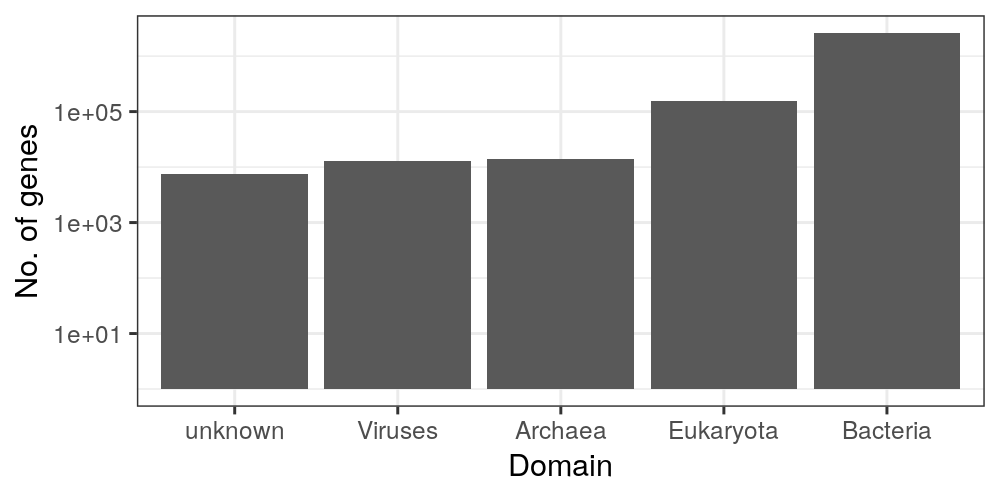

In [205]:
# number of UniRefIDs
hm2_f_s = hm2_f %>%
    group_by(Domain) %>%
    summarize(n = n_distinct(original_name)) %>%
    ungroup()

p = hm2_f_s %>%
    filter(n >= 100) %>%
    mutate(Domain = Domain %>% reorder(n)) %>%
    as_tibble %>%
    ggplot(aes(Domain, n)) +
    geom_bar(stat='identity', position='dodge') +
    scale_y_log10() +
    labs(y='No. of genes') +
    theme_bw() 

p.dims(5,2.5)
plot(p)

File written: /ebio/abt3_projects/Georg_animal_feces/notebooks/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/04_assemblies/02_LLMGAG/.figures/abe71937cc06641c6acf68b38dd52eb4.RDS 


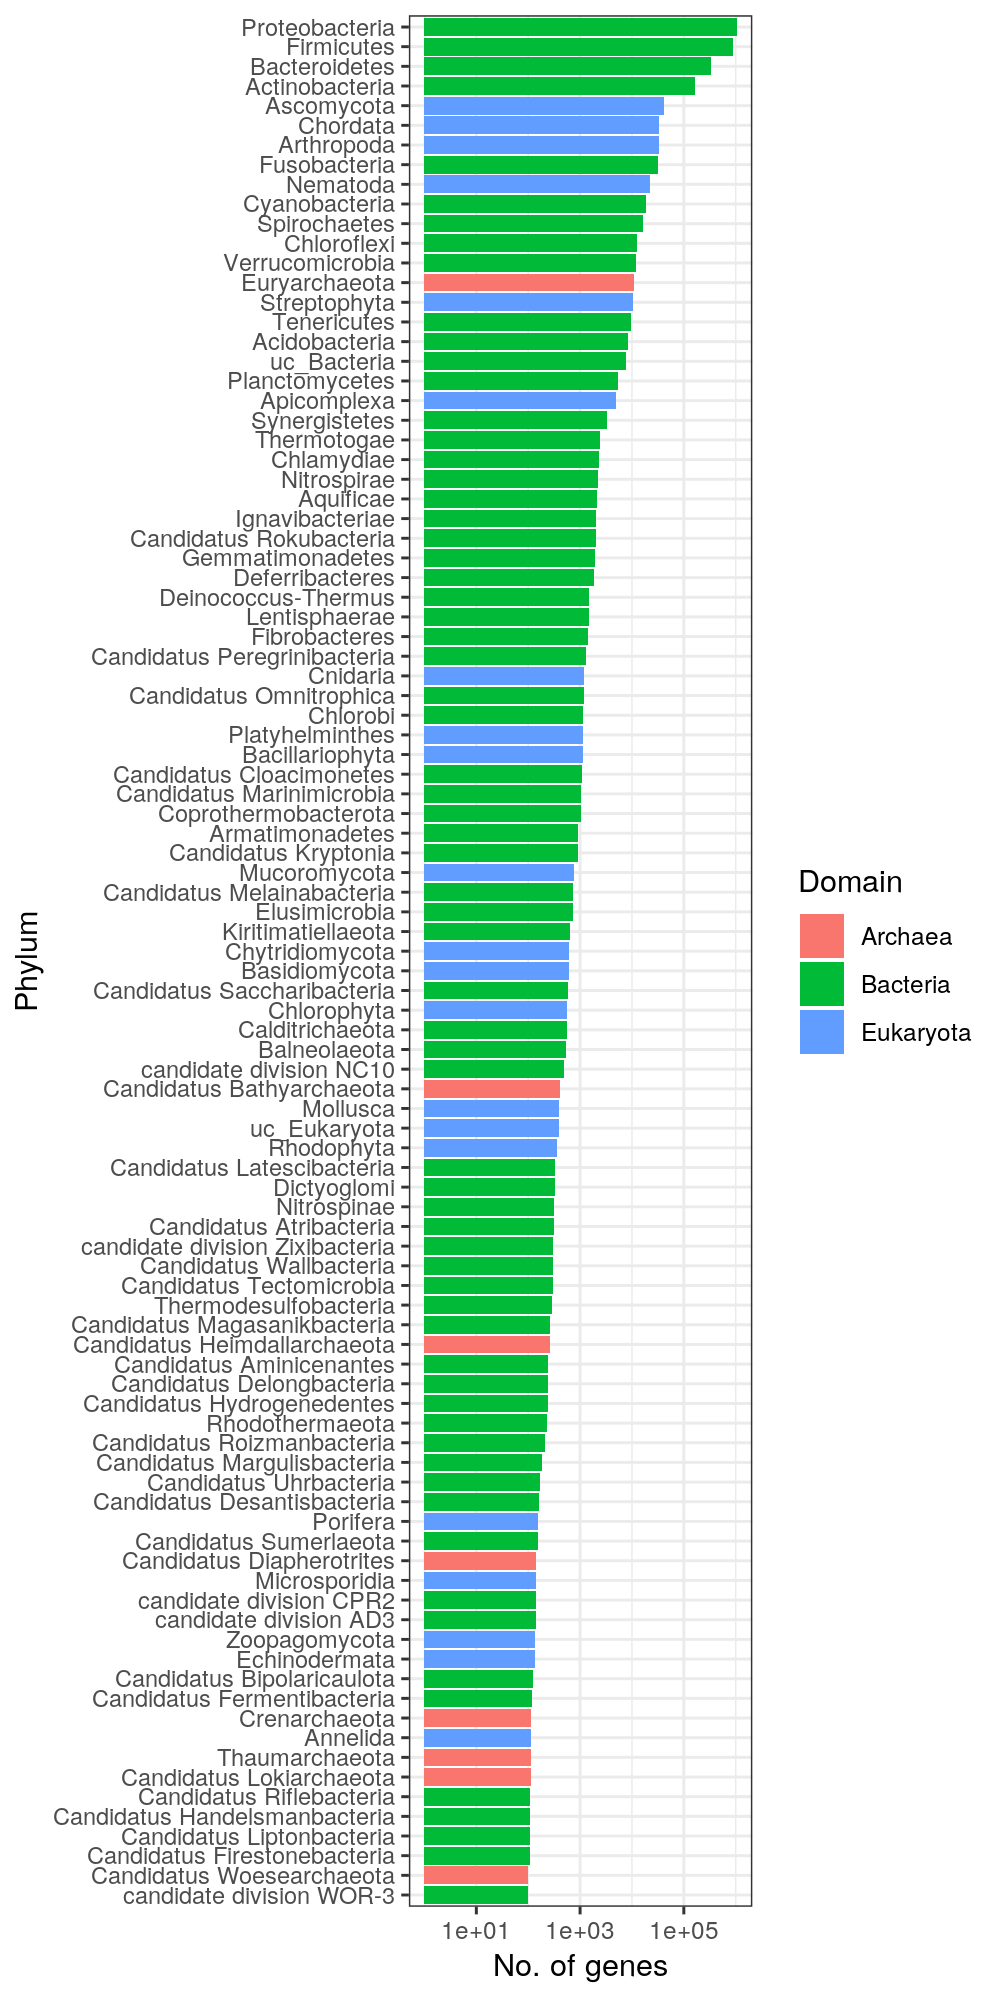

In [215]:
# number of UniRefIDs
hm2_f_s = hm2_f %>%
    group_by(Domain, Phylum) %>%
    summarize(n = n_distinct(original_name)) %>%
    ungroup()

p = hm2_f_s %>%
    filter(n >= 100,
           Domain != 'unknown',
           Phylum != 'unknown') %>%
    mutate(Phylum = Phylum %>% reorder(n)) %>%
    as_tibble %>% 
    ggplot(aes(Phylum, n, fill=Domain)) +
    geom_bar(stat='identity', position='dodge') +
    scale_y_log10() +
    coord_flip() +
    labs(y='No. of genes') +
    theme_bw() +
    theme(
        axis.text.y = element_text(size=8.5)
    )
    
p.dims(5,10)
Plot(p)

# sessionInfo

In [135]:
sessionInfo()

R version 3.4.1 (2017-06-30)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 18.04.2 LTS

Matrix products: default
BLAS: /ebio/abt3_projects/software/miniconda3_gt4.4/envs/py3_physeq/lib/R/lib/libRblas.so
LAPACK: /ebio/abt3_projects/software/miniconda3_gt4.4/envs/py3_physeq/lib/R/lib/libRlapack.so

locale:
[1] en_US.UTF-8

attached base packages:
[1] parallel  stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
[1] bindrcpp_0.2.2    doParallel_1.0.11 iterators_1.0.10  foreach_1.4.4    
[5] data.table_1.11.4 ggplot2_3.0.0     tidyr_0.8.1       dplyr_0.7.6      

loaded via a namespace (and not attached):
 [1] Rcpp_0.12.17     pillar_1.2.2     compiler_3.4.1   plyr_1.8.4      
 [5] bindr_0.1.1      base64enc_0.1-3  tools_3.4.1      digest_0.6.15   
 [9] uuid_0.1-2       jsonlite_1.5     evaluate_0.10.1  tibble_1.4.2    
[13] gtable_0.2.0     pkgconfig_2.0.1  rlang_0.2.1      IRdisplay_0.4.4 
[17] IRkernel_0.8.12  repr_0.15.0   